#Dataset


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# Import the libraries and start the models that we are going to use later.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.svm import SVC, OneClassSVM
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.ensemble import IsolationForest
from scipy.stats import f_oneway, shapiro, levene
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score, roc_auc_score, classification_report, roc_auc_score, roc_curve, auc
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression




scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'kappa': make_scorer(cohen_kappa_score),
    'roc_auc': make_scorer(roc_auc_score),
}
metric_names = ['accuracy', 'precision','recall', 'f1', 'kappa', 'roc_auc']


kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rf_model = RandomForestClassifier(n_estimators=80, random_state=42) #Modelo Random Forest
svm_model = SVC(gamma='auto', random_state=42) #Modelo SVM

In [3]:
# RNAseq data loading and transformation
datos = pd.read_csv('/content/drive/MyDrive/Datosrna.csv', sep=';', header=None).transpose()
datos.columns = datos.iloc[0]
datos = datos[1:]
# I sort the DataFrame according to the “Gene ID” column containing the sample identifiers.
datos = datos.sort_values(by='Gene ID')
datos = datos.drop(columns=datos.columns[0])
X = datos.copy()
print(X.shape)
# Loading and transformation of clinical data
datos_clinicos = pd.read_csv('/content/drive/MyDrive/datos_clinicos.csv', sep=';')
# Transform and sort the clinical data into a vector with the classification
dfClasificacion_ordenados = datos_clinicos.sort_values(by="GEO ID (GSE89843)")
y = dfClasificacion_ordenados['Classification group'].copy()
y_ = y.copy()
# Use LabelEncoder for the sorting vector
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Data standardisation
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


<ipython-input-3-640b1dfa77e6>:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263

(779, 4722)


#Clasificación con Random Forest y SVM para el dataset completo

In [4]:
y_prueba = y.copy()

# RandomForest
rf_scores_normal = cross_validate(rf_model, X, y_prueba, cv=kfold, scoring=scoring, return_train_score=True)
print("Resultados usando RF:")
for metric in metric_names:
    mean_train_score = rf_scores_normal[f'train_{metric}'].mean()
    std_train_score = rf_scores_normal[f'train_{metric}'].std()

    mean_test_score = rf_scores_normal[f'test_{metric}'].mean()
    std_test_score = rf_scores_normal[f'test_{metric}'].std()

    print(f"{metric.split('_')[-1].capitalize()} - Train Media: {mean_train_score:.3f} ± {std_train_score:.3f} | Test Media: {mean_test_score:.3f} ± {std_test_score:.3f}")

# SVM
svm_scores_normal = cross_validate(svm_model, X, y_prueba, cv=kfold, scoring=scoring, return_train_score=True)
print("\nResultados usando SVM:")
for metric in metric_names:
    mean_train_score = svm_scores_normal[f'train_{metric}'].mean()
    std_train_score = svm_scores_normal[f'train_{metric}'].std()

    mean_test_score = svm_scores_normal[f'test_{metric}'].mean()
    std_test_score = svm_scores_normal[f'test_{metric}'].std()

    print(f"{metric.split('_')[-1].capitalize()} - Train Media: {mean_train_score:.3f} ± {std_train_score:.3f} | Test Media: {mean_test_score:.3f} ± {std_test_score:.3f}")


Resultados usando RF:
Accuracy - Train Media: 1.000 ± 0.000 | Test Media: 0.822 ± 0.041
Precision - Train Media: 1.000 ± 0.000 | Test Media: 0.820 ± 0.044
Recall - Train Media: 1.000 ± 0.000 | Test Media: 0.812 ± 0.062
F1 - Train Media: 1.000 ± 0.000 | Test Media: 0.815 ± 0.044
Kappa - Train Media: 1.000 ± 0.000 | Test Media: 0.643 ± 0.082
Auc - Train Media: 1.000 ± 0.000 | Test Media: 0.821 ± 0.041

Resultados usando SVM:
Accuracy - Train Media: 0.926 ± 0.005 | Test Media: 0.842 ± 0.043
Precision - Train Media: 0.926 ± 0.006 | Test Media: 0.843 ± 0.056
Recall - Train Media: 0.920 ± 0.007 | Test Media: 0.833 ± 0.060
F1 - Train Media: 0.923 ± 0.005 | Test Media: 0.836 ± 0.044
Kappa - Train Media: 0.851 ± 0.009 | Test Media: 0.684 ± 0.085
Auc - Train Media: 0.925 ± 0.005 | Test Media: 0.842 ± 0.042


#Detección de outliers mediante Chebyshev y su rendimiento en predicción mediante RF y SVM

In [9]:
dfDatos = X.copy()
dfDatos = pd.DataFrame(dfDatos)
dfDatos['Clasificacion'] = y
# Outliers Chebyshev
mean = dfDatos.mean()
std = dfDatos.std()
k = 1.5
lower_limit = mean - k * std
upper_limit = mean + k * std
dfDatos, lower_limit_aligned = dfDatos.align(lower_limit, axis=1, copy=False)
dfDatos, upper_limit_aligned = dfDatos.align(upper_limit, axis=1, copy=False)
outliers = ((dfDatos < lower_limit_aligned) | (dfDatos > upper_limit_aligned)).any(axis=1)

# DataFrame without outliers and all its columns
outliers_chebyshev = dfDatos[outliers]
print(outliers_chebyshev.shape)
# DataFrame with only Chebyshev's outliers
dfDatos_sin_chebyshev = dfDatos[~outliers]
print(dfDatos_sin_chebyshev.shape)
# Two DataFrames are created, one with the complete dataset except for
# the detected outliers and the other with the classification of the samples present.
X_outliers_chebyshev = outliers_chebyshev.iloc[:, :-1].copy()
y_outliers_chebyshev = outliers_chebyshev['Clasificacion']

# RandomForest
rf_scores_chebyshev  = cross_validate(rf_model, X_outliers_chebyshev, y_outliers_chebyshev, cv=kfold, scoring=scoring, return_train_score=True)
print("Resultados usando RF:")
for metric in metric_names:
    mean_train_score = rf_scores_chebyshev[f'train_{metric}'].mean()
    std_train_score = rf_scores_chebyshev[f'train_{metric}'].std()

    mean_test_score = rf_scores_chebyshev[f'test_{metric}'].mean()
    std_test_score = rf_scores_chebyshev[f'test_{metric}'].std()

    print(f"{metric.split('_')[-1].capitalize()} - Train Media: {mean_train_score:.3f} ± {std_train_score:.3f} | Test Media: {mean_test_score:.3f} ± {std_test_score:.3f}")

# SVM
svm_scores_chebyshev = cross_validate(svm_model, X_outliers_chebyshev, y_outliers_chebyshev, cv=kfold, scoring=scoring, return_train_score=True)
print("\nResultados usando SVM:")
for metric in metric_names:
    mean_train_score = svm_scores_chebyshev[f'train_{metric}'].mean()
    std_train_score = svm_scores_chebyshev[f'train_{metric}'].std()

    mean_test_score = svm_scores_chebyshev[f'test_{metric}'].mean()
    std_test_score = svm_scores_chebyshev[f'test_{metric}'].std()

    print(f"{metric.split('_')[-1].capitalize()} - Train Media: {mean_train_score:.3f} ± {std_train_score:.3f} | Test Media: {mean_test_score:.3f} ± {std_test_score:.3f}")



(687, 4723)
(92, 4723)
Resultados usando RF:
Accuracy - Train Media: 1.000 ± 0.000 | Test Media: 0.824 ± 0.038
Precision - Train Media: 1.000 ± 0.000 | Test Media: 0.823 ± 0.063
Recall - Train Media: 1.000 ± 0.000 | Test Media: 0.806 ± 0.065
F1 - Train Media: 1.000 ± 0.000 | Test Media: 0.812 ± 0.041
Kappa - Train Media: 1.000 ± 0.000 | Test Media: 0.646 ± 0.077
Auc - Train Media: 1.000 ± 0.000 | Test Media: 0.823 ± 0.038

Resultados usando SVM:
Accuracy - Train Media: 0.939 ± 0.006 | Test Media: 0.857 ± 0.039
Precision - Train Media: 0.930 ± 0.007 | Test Media: 0.858 ± 0.071
Recall - Train Media: 0.941 ± 0.006 | Test Media: 0.846 ± 0.054
F1 - Train Media: 0.935 ± 0.006 | Test Media: 0.849 ± 0.038
Kappa - Train Media: 0.877 ± 0.011 | Test Media: 0.714 ± 0.077
Auc - Train Media: 0.939 ± 0.006 | Test Media: 0.857 ± 0.038


#Ídem con One-Class-SVM


In [15]:
# OneClassSVM
svm_model_oneclass = OneClassSVM(nu=0.1)
svm_model_oneclass.fit(dfDatos.iloc[:, :-1])  # We train with all columns except the column containing the classification class.

# Outlier prediction using One-Class SVM
outliers_svm = svm_model_oneclass.predict(dfDatos.iloc[:, :-1]) == -1  #-1 representa los outliers detectados


# DataFrame with the outliers detected by One-Class SVM and all its columns
outliers_svm_df = dfDatos[outliers_svm]

# Original DataFrame without the outliers detected by One-Class SVM
dfDatos_sin_svm = dfDatos[~outliers_svm]
# Idem Chebyshev
X_outliers_svm = dfDatos_sin_svm.iloc[:, :-1].copy()
y_outliers_svm = dfDatos_sin_svm['Clasificacion']
print(len(outliers_svm_df))


# RandomForest
rf_scores_svm  = cross_validate(rf_model, X_outliers_svm, y_outliers_svm, cv=kfold, scoring=scoring, return_train_score=True)
print("Resultados usando RF")
for metric in metric_names:
    # Training metrics
    mean_train_score = rf_scores_svm[f'train_{metric}'].mean()
    std_train_score = rf_scores_svm[f'train_{metric}'].std()

    # Test metrics
    mean_test_score = rf_scores_svm[f'test_{metric}'].mean()
    std_test_score = rf_scores_svm[f'test_{metric}'].std()

    print(f"{metric.split('_')[-1].capitalize()} - Train Media: {mean_train_score:.3f} ± {std_train_score:.3f} | Test Media: {mean_test_score:.3f} ± {std_test_score:.3f}")


# SVM
svm_scores_svm = cross_validate(svm_model, X_outliers_svm, y_outliers_svm, cv=kfold, scoring=scoring, return_train_score=True)
print("\nResultados usando SVM:")
for metric in metric_names:
    mean_train_score = svm_scores_svm[f'train_{metric}'].mean()
    std_train_score = svm_scores_svm[f'train_{metric}'].std()

    mean_test_score = svm_scores_svm[f'test_{metric}'].mean()
    std_test_score = svm_scores_svm[f'test_{metric}'].std()

    print(f"{metric.split('_')[-1].capitalize()} - Train Media: {mean_train_score:.3f} ± {std_train_score:.3f} | Test Media: {mean_test_score:.3f} ± {std_test_score:.3f}")


77
Resultados usando RF
Accuracy - Train Media: 1.000 ± 0.000 | Test Media: 0.816 ± 0.054
Precision - Train Media: 1.000 ± 0.000 | Test Media: 0.805 ± 0.062
Recall - Train Media: 1.000 ± 0.000 | Test Media: 0.831 ± 0.074
F1 - Train Media: 1.000 ± 0.000 | Test Media: 0.816 ± 0.054
Kappa - Train Media: 1.000 ± 0.000 | Test Media: 0.632 ± 0.109
Auc - Train Media: 1.000 ± 0.000 | Test Media: 0.816 ± 0.055

Resultados usando SVM:
Accuracy - Train Media: 0.919 ± 0.005 | Test Media: 0.860 ± 0.048
Precision - Train Media: 0.920 ± 0.004 | Test Media: 0.857 ± 0.049
Recall - Train Media: 0.915 ± 0.008 | Test Media: 0.860 ± 0.072
F1 - Train Media: 0.918 ± 0.005 | Test Media: 0.857 ± 0.052
Kappa - Train Media: 0.839 ± 0.009 | Test Media: 0.720 ± 0.097
Auc - Train Media: 0.919 ± 0.005 | Test Media: 0.860 ± 0.049


#Ídem con LOF

In [17]:
# LOF
lof_model = LocalOutlierFactor(n_neighbors=100)
outliers_lof = lof_model.fit_predict(dfDatos.iloc[:, :-1])

# Identifying outliers detected by LOF
outliers_lof = outliers_lof == -1  # -1 represents the outliers detected

# DataFrame with the outliers detected by LOF and all its columns
outliers_lof_df = dfDatos[outliers_lof]

# Original DataFrame without outliers detected by LOF
dfDatos_sin_lof = dfDatos[~outliers_lof]

# Idem a Chebyshev
X_outliers_lof = dfDatos_sin_lof.iloc[:, :-1].copy()
y_outliers_lof = dfDatos_sin_lof['Clasificacion']
print(X_outliers_lof.shape)


# RandomForest
rf_scores_lof  = cross_validate(rf_model, X_outliers_lof, y_outliers_lof, cv=kfold, scoring=scoring, return_train_score=True)
print("Resultados usando RF")
for metric in metric_names:
    mean_train_score = rf_scores_lof[f'train_{metric}'].mean()
    std_train_score = rf_scores_lof[f'train_{metric}'].std()

    mean_test_score = rf_scores_lof[f'test_{metric}'].mean()
    std_test_score = rf_scores_lof[f'test_{metric}'].std()

    print(f"{metric.split('_')[-1].capitalize()} - Train Media: {mean_train_score:.3f} ± {std_train_score:.3f} | Test Media: {mean_test_score:.3f} ± {std_test_score:.3f}")



svm_scores_lof = cross_validate(svm_model, X_outliers_lof, y_outliers_lof, cv=kfold, scoring=scoring, return_train_score=True)
print("\nResultados usando SVM:")
for metric in metric_names:
    mean_train_score = svm_scores_lof[f'train_{metric}'].mean()
    std_train_score = svm_scores_lof[f'train_{metric}'].std()

    mean_test_score = svm_scores_lof[f'test_{metric}'].mean()
    std_test_score = svm_scores_lof[f'test_{metric}'].std()

    print(f"{metric.split('_')[-1].capitalize()} - Train Media: {mean_train_score:.3f} ± {std_train_score:.3f} | Test Media: {mean_test_score:.3f} ± {std_test_score:.3f}")



(672, 4722)
Resultados usando RF
Accuracy - Train Media: 1.000 ± 0.000 | Test Media: 0.825 ± 0.035
Precision - Train Media: 1.000 ± 0.000 | Test Media: 0.817 ± 0.058
Recall - Train Media: 1.000 ± 0.000 | Test Media: 0.841 ± 0.070
F1 - Train Media: 1.000 ± 0.000 | Test Media: 0.826 ± 0.035
Kappa - Train Media: 1.000 ± 0.000 | Test Media: 0.649 ± 0.070
Auc - Train Media: 1.000 ± 0.000 | Test Media: 0.825 ± 0.035

Resultados usando SVM:
Accuracy - Train Media: 0.916 ± 0.003 | Test Media: 0.851 ± 0.026
Precision - Train Media: 0.919 ± 0.005 | Test Media: 0.862 ± 0.052
Recall - Train Media: 0.910 ± 0.003 | Test Media: 0.838 ± 0.035
F1 - Train Media: 0.914 ± 0.003 | Test Media: 0.849 ± 0.024
Kappa - Train Media: 0.831 ± 0.006 | Test Media: 0.702 ± 0.052
Auc - Train Media: 0.916 ± 0.003 | Test Media: 0.851 ± 0.026


#Idem con Isolation Forest

In [20]:
# ISOLATION FOREST
isolation_forest_model = IsolationForest(n_estimators=100, random_state=42)
outliers_isolation_forest = isolation_forest_model.fit_predict(dfDatos.iloc[:, :-1])

# Identifying outliers detected by Isolation Forest
outliers_isolation_forest = outliers_isolation_forest == -1  # -1 represents the outliers detected

# DataFrame with the outliers detected by Isolation Forest and all its columns
outliers_isolation_forest_df = dfDatos[outliers_isolation_forest]

# Original DataFrame without outliers detected by Isolation Forest
dfDatos_sin_isolation_forest = dfDatos[~outliers_isolation_forest]
X_outliers_isolation_forest = dfDatos_sin_isolation_forest.iloc[:, :-1].copy()
y_outliers_isolation_forest = dfDatos_sin_isolation_forest['Clasificacion']


# RandomForest
rf_scores_isolation  = cross_validate(rf_model, X_outliers_isolation_forest, y_outliers_isolation_forest, cv=kfold, scoring=scoring, return_train_score=True)
print("Resultados usando RF")
for metric in metric_names:
    mean_train_score = rf_scores_isolation[f'train_{metric}'].mean()
    std_train_score = rf_scores_isolation[f'train_{metric}'].std()


    mean_test_score = rf_scores_isolation[f'test_{metric}'].mean()
    std_test_score = rf_scores_isolation[f'test_{metric}'].std()

    print(f"{metric.split('_')[-1].capitalize()} - Train Media: {mean_train_score:.3f} ± {std_train_score:.3f} | Test Media: {mean_test_score:.3f} ± {std_test_score:.3f}")

# SVM
svm_scores_isolation = cross_validate(svm_model, X_outliers_isolation_forest, y_outliers_isolation_forest, cv=kfold, scoring=scoring, return_train_score=True)
print("\nResultados usando SVM:")
for metric in metric_names:
    mean_train_score = svm_scores_isolation[f'train_{metric}'].mean()
    std_train_score = svm_scores_isolation[f'train_{metric}'].std()

    mean_test_score = svm_scores_isolation[f'test_{metric}'].mean()
    std_test_score = svm_scores_isolation[f'test_{metric}'].std()

    print(f"{metric.split('_')[-1].capitalize()} - Train Media: {mean_train_score:.3f} ± {std_train_score:.3f} | Test Media: {mean_test_score:.3f} ± {std_test_score:.3f}")



Resultados usando RF
Accuracy - Train Media: 1.000 ± 0.000 | Test Media: 0.819 ± 0.030
Precision - Train Media: 1.000 ± 0.000 | Test Media: 0.823 ± 0.053
Recall - Train Media: 1.000 ± 0.000 | Test Media: 0.812 ± 0.048
F1 - Train Media: 1.000 ± 0.000 | Test Media: 0.816 ± 0.029
Kappa - Train Media: 1.000 ± 0.000 | Test Media: 0.639 ± 0.060
Auc - Train Media: 1.000 ± 0.000 | Test Media: 0.820 ± 0.030

Resultados usando SVM:
Accuracy - Train Media: 0.919 ± 0.004 | Test Media: 0.849 ± 0.041
Precision - Train Media: 0.922 ± 0.007 | Test Media: 0.849 ± 0.053
Recall - Train Media: 0.913 ± 0.005 | Test Media: 0.850 ± 0.067
F1 - Train Media: 0.918 ± 0.004 | Test Media: 0.847 ± 0.042
Kappa - Train Media: 0.838 ± 0.009 | Test Media: 0.699 ± 0.082
Auc - Train Media: 0.919 ± 0.004 | Test Media: 0.849 ± 0.041


#Shapiro-Wilk test for normality and Levene test for homoscedasticity of F1-Score results

As the p-Value is > 0.05 for both tests, we assume that the F1-Score results follow a normal distribution and there is homogeneity of variances.

In [ ]:
# I get the F1 values for each model
"""
rf_f1_normal = rf_scores_normal['test_f1']
rf_f1_chebyshev = rf_scores_chebyshev['test_f1']
rf_f1_isolation = rf_scores_isolation['test_f1']
rf_f1_lof = rf_scores_lof['test_f1']
rf_f1_svm = rf_scores_svm['test_f1']
"""
svm_f1_normal = svm_scores_normal['test_f1']
svm_f1_chebyshev = svm_scores_chebyshev['test_f1']
svm_f1_isolation = svm_scores_isolation['test_f1']
svm_f1_lof = svm_scores_lof['test_f1']
svm_f1_svm = svm_scores_svm['test_f1']
"""
# Shapiro-Wilk test for each RandomForest result
shapiro_stat_normal, shapiro_p_normal = shapiro(rf_f1_normal)
shapiro_stat_chebyshev, shapiro_p_chebyshev = shapiro(rf_f1_chebyshev)
shapiro_stat_isolation, shapiro_p_isolation = shapiro(rf_f1_isolation)
shapiro_stat_lof, shapiro_p_lof = shapiro(rf_f1_lof)
shapiro_stat_svm, shapiro_p_svm = shapiro(rf_f1_svm)
# Results
print(f"Shapiro-Wilk para F1 en el modelo RF normal: Estadístico={shapiro_stat_normal:.3f}, p-valor={shapiro_p_normal:.3f}")
print(f"Shapiro-Wilk para F1 en el modelo RF Chebyshev: Estadístico={shapiro_stat_chebyshev:.3f}, p-valor={shapiro_p_chebyshev:.3f}")
print(f"Shapiro-Wilk para F1 en el modelo RF Isolation: Estadístico={shapiro_stat_isolation:.3f}, p-valor={shapiro_p_isolation:.3f}")
print(f"Shapiro-Wilk para F1 en el modelo RF LOF: Estadístico={shapiro_stat_lof:.3f}, p-valor={shapiro_p_lof:.3f}")
print(f"Shapiro-Wilk para F1 en el modelo RF One Class SVM: Estadístico={shapiro_stat_svm:.3f}, p-valor={shapiro_p_svm:.3f}")
"""
# Shapiro-Wilk test for each SVM result
shapiro_stat_normal, shapiro_p_normal = shapiro(svm_f1_normal)
shapiro_stat_chebyshev, shapiro_p_chebyshev = shapiro(svm_f1_chebyshev)
shapiro_stat_isolation, shapiro_p_isolation = shapiro(svm_f1_isolation)
shapiro_stat_lof, shapiro_p_lof = shapiro(svm_f1_lof)
shapiro_stat_svm, shapiro_p_svm = shapiro(svm_f1_svm)

# Results
print(f"Shapiro-Wilk para F1 en el modelo SVM normal: Estadístico={shapiro_stat_normal:.3f}, p-valor={shapiro_p_normal:.3f}")
print(f"Shapiro-Wilk para F1 en el modelo SVM Chebyshev: Estadístico={shapiro_stat_chebyshev:.3f}, p-valor={shapiro_p_chebyshev:.3f}")
print(f"Shapiro-Wilk para F1 en el modelo SVM Isolation: Estadístico={shapiro_stat_isolation:.3f}, p-valor={shapiro_p_isolation:.3f}")
print(f"Shapiro-Wilk para F1 en el modelo SVM LOF: Estadístico={shapiro_stat_lof:.3f}, p-valor={shapiro_p_lof:.3f}")
print(f"Shapiro-Wilk para F1 en el modelo SVM One Class SVM: Estadístico={shapiro_stat_svm:.3f}, p-valor={shapiro_p_svm:.3f}")



# LEVENE
levene_stat, levene_p = levene(svm_f1_normal, svm_f1_chebyshev, svm_f1_isolation, svm_f1_lof, svm_f1_svm)
print(f"\nPrueba de Levene para F1: Estadístico={levene_stat:.3f}, p-valor={levene_p:.3f}")

Shapiro-Wilk para F1 en el modelo SVM normal: Estadístico=0.972, p-valor=0.909
Shapiro-Wilk para F1 en el modelo SVM Chebyshev: Estadístico=0.956, p-valor=0.740
Shapiro-Wilk para F1 en el modelo SVM Isolation: Estadístico=0.924, p-valor=0.394
Shapiro-Wilk para F1 en el modelo SVM LOF: Estadístico=0.908, p-valor=0.265
Shapiro-Wilk para F1 en el modelo SVM One Class SVM: Estadístico=0.950, p-valor=0.669

Prueba de Levene para F1: Estadístico=1.095, p-valor=0.371


#ANOVA and Tukey for the F1-Score results

As the p-Value of the ANOVA is < 0.05 then we assume that there are significant differences between at least two different models. We run Tukey's test to check which models have significant differences between them.

Valor F: 0.300, p-Value: 8.762e-01
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1           group2      meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------
       Chebyshev Isolation Forest  -0.0019    1.0 -0.0569 0.0531  False
       Chebyshev              LOF  -0.0005    1.0 -0.0555 0.0546  False
       Chebyshev    One-Class SVM   0.0082 0.9931 -0.0468 0.0632  False
       Chebyshev         Original  -0.0128 0.9636 -0.0678 0.0422  False
Isolation Forest              LOF   0.0015    1.0 -0.0536 0.0565  False
Isolation Forest    One-Class SVM   0.0101 0.9847 -0.0449 0.0651  False
Isolation Forest         Original  -0.0109 0.9798 -0.0659 0.0441  False
             LOF    One-Class SVM   0.0086 0.9915 -0.0464 0.0637  False
             LOF         Original  -0.0123  0.968 -0.0674 0.0427  False
   One-Class SVM         Original   -0.021 0.8136  -0.076  0.034  False
-----------------------------

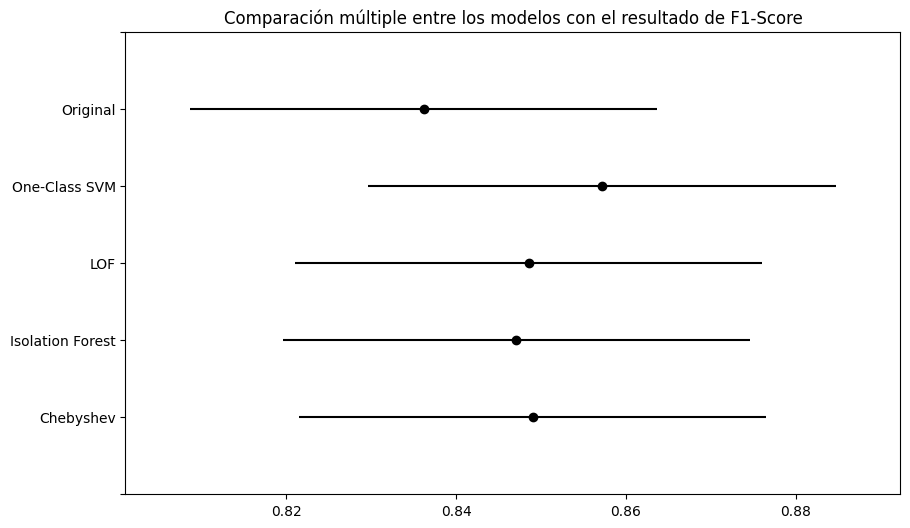

In [ ]:
# ANOVA
f_statistic, p_value = f_oneway(svm_f1_normal, svm_f1_chebyshev, svm_f1_isolation, svm_f1_lof, svm_f1_svm)
print(f"Valor F: {f_statistic:.3f}, p-Value: {p_value:.3e}")

# Tukey
modelos = [svm_f1_normal, svm_f1_chebyshev, svm_f1_isolation, svm_f1_lof, svm_f1_svm]

# A list of labels is created to identify each dataset.
labels = ['Original'] * len(svm_f1_normal) + ['Chebyshev'] * len(svm_f1_chebyshev) + ['Isolation Forest'] * len(svm_f1_isolation) + ['LOF'] * len(svm_f1_lof) + ['One-Class SVM'] * len(svm_f1_svm)

# Convert to array
datos = np.concatenate(modelos)

# Tukey's test
tukey = pairwise_tukeyhsd(datos, labels)

# Results
print(tukey.summary())
tukey.plot_simultaneous()
plt.title('Comparación múltiple entre los modelos con el resultado de F1-Score')
plt.show()

#Feature Selection using SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

max_f1_scores = []

for num_features in range(10, 200, 5):  # Testing from 10 to 1000 features
    X_selected = X.copy()
    selector = SelectKBest(score_func=f_classif, k=num_features)
    X_selected = selector.fit_transform(X_selected, y)

    # Train and evaluate RandomForest
    rf_rbf = cross_validate(rf_model, X_selected, y, cv=kfold, scoring=scoring)
    rf_f1_mean = rf_rbf['test_f1'].mean()

    # Train and evaluate SVM
    svm_rbf = cross_validate(svm_model, X_selected, y, cv=kfold, scoring=scoring)
    svm_f1_mean = svm_rbf['test_f1'].mean()

    # Compare the F1-Scores and keep the higher one
    best_f1_score = max(rf_f1_mean, svm_f1_mean)
    max_f1_scores.append((num_features, best_f1_score))

# Sort the results by the highest F1-Score
max_f1_scores.sort(key=lambda x: x[1], reverse=True)

# Show top 5 feature sets with best F1-Score
print("Top 5 conjuntos de características con el mejor F1-Score:")
for i, (num_features, best_f1_score) in enumerate(max_f1_scores[:5]):
    print(f"Conjunto {i + 1}: Num. Características={num_features}, F1-Score={best_f1_score:.3f}")


Top 5 conjuntos de características con el mejor F1-Score:
Conjunto 1: Num. Características=195, F1-Score=0.850
Conjunto 2: Num. Características=170, F1-Score=0.850
Conjunto 3: Num. Características=120, F1-Score=0.849
Conjunto 4: Num. Características=190, F1-Score=0.848
Conjunto 5: Num. Características=110, F1-Score=0.848


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X_selected = X.copy()
y_prueba = y.copy()
num_features = 195
selector = SelectKBest(score_func=f_classif, k=num_features)
X_selected = selector.fit_transform(X_selected, y)
X_selected = pd.DataFrame(X_selected)
"""
# RandomForest
rf_selected = cross_validate(rf_model, X_selected, y_prueba, cv=kfold, scoring=scoring, return_train_score=True)
print("Resultados usando RF:")
for metric in metric_names:
    mean_train_score = rf_selected[f'train_{metric}'].mean()
    std_train_score = rf_selected[f'train_{metric}'].std()

    mean_test_score = rf_selected[f'test_{metric}'].mean()
    std_test_score = rf_selected[f'test_{metric}'].std()

    print(f"{metric.split('_')[-1].capitalize()} - Train Media: {mean_train_score:.3f} ± {std_train_score:.3f} | Test Media: {mean_test_score:.3f} ± {std_test_score:.3f}")
"""
# SVM
svm_selected = cross_validate(svm_model, X_selected, y_prueba, cv=kfold, scoring=scoring, return_train_score=True)
print("\nResultados usando SVM:")
for metric in metric_names:
    mean_train_score = svm_selected[f'train_{metric}'].mean()
    std_train_score = svm_selected[f'train_{metric}'].std()

    mean_test_score = svm_selected[f'test_{metric}'].mean()
    std_test_score = svm_selected[f'test_{metric}'].std()

    print(f"{metric.split('_')[-1].capitalize()} - Train Media: {mean_train_score:.3f} ± {std_train_score:.3f} | Test Media: {mean_test_score:.3f} ± {std_test_score:.3f}")



Resultados usando SVM:
Accuracy - Train Media: 0.899 ± 0.006 | Test Media: 0.857 ± 0.042
Precision - Train Media: 0.888 ± 0.004 | Test Media: 0.857 ± 0.028
Recall - Train Media: 0.905 ± 0.012 | Test Media: 0.846 ± 0.076
F1 - Train Media: 0.896 ± 0.007 | Test Media: 0.850 ± 0.047
Kappa - Train Media: 0.797 ± 0.013 | Test Media: 0.714 ± 0.084
Auc - Train Media: 0.899 ± 0.006 | Test Media: 0.857 ± 0.043


#Feature Selection using RandomForest

In [ ]:
model = RandomForestClassifier(random_state=42)
# Threshold's range
threshold_range = [i * 0.0001 for i in range(1, 61)]  # From 0.0001 to 0.006 increasing by 0.0001 each time. This is because at 0.006 the model only selects 3 variables.
max_f1_scores = [] # Store results for each threshold

for threshold in threshold_range:
    # Feature Selection
    X_rf = X.copy()
    model.fit(X_rf,y)
    feature_importances = model.feature_importances_
    X_rf = X[:, feature_importances > threshold]

    # RandomForest
    rf_rf = cross_validate(rf_model, X_rf, y, cv=kfold, scoring=scoring)
    f1_rf = rf_rf['test_f1'].mean()
    # SVM
    svm_rf = cross_validate(svm_model, X_rf, y, cv=kfold, scoring=scoring)
    f1_svm = svm_rf['test_f1'].mean()
    # Selection of best F1-Score and storage of result
    best_f1_score = max(f1_rf,f1_svm)
    numero_genes = X_rf.shape[1]
    max_f1_scores.append((threshold,best_f1_score,numero_genes))


# I sort the results by F1-Score
max_f1_scores.sort(key=lambda x: x[1], reverse=True)

In [ ]:
# Prints the 10 best thresholds for RandomForest
print("Top 10 Threshold según F1-Score:")
for i,(threshold,F1,genes) in enumerate(max_f1_scores[:10]):
  print(f"El threshold {threshold:.4f} tiene una media F1-Score: {F1:.3f} y contiene {genes} variables")


Top 10 Threshold según F1-Score:
El threshold 0.0006 tiene una media F1-Score: 0.884 y contiene 300 variables
El threshold 0.0004 tiene una media F1-Score: 0.883 y contiene 542 variables
El threshold 0.0005 tiene una media F1-Score: 0.879 y contiene 380 variables
El threshold 0.0007 tiene una media F1-Score: 0.877 y contiene 252 variables
El threshold 0.0003 tiene una media F1-Score: 0.874 y contiene 800 variables
El threshold 0.0009 tiene una media F1-Score: 0.874 y contiene 199 variables
El threshold 0.0027 tiene una media F1-Score: 0.874 y contiene 42 variables
El threshold 0.0008 tiene una media F1-Score: 0.873 y contiene 223 variables
El threshold 0.0020 tiene una media F1-Score: 0.870 y contiene 67 variables
El threshold 0.0034 tiene una media F1-Score: 0.869 y contiene 28 variables


In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
feature_importances = model.feature_importances_
threshold = 0.0006
X_rf = X[:, feature_importances > threshold]
X_rf = pd.DataFrame(X_rf)
#X_rf.to_csv('X_rf.csv', index=False)
"""
# RandomForest
rf_rf = cross_validate(rf_model, X_rf, y, cv=kfold, scoring=scoring, return_train_score=True)
print("Resultados usando RF:")
for metric in metric_names:
    mean_train_score = rf_rf[f'train_{metric}'].mean()
    std_train_score = rf_rf[f'train_{metric}'].std()

    mean_test_score = rf_rf[f'test_{metric}'].mean()
    std_test_score = rf_rf[f'test_{metric}'].std()

    print(f"{metric.split('_')[-1].capitalize()} - Train Media: {mean_train_score:.3f} ± {std_train_score:.3f} | Test Media: {mean_test_score:.3f} ± {std_test_score:.3f}")
"""
# SVM
svm_rf = cross_validate(svm_model, X_rf, y, cv=kfold, scoring=scoring, return_train_score=True)
print("\nResultados usando SVM:")
for metric in metric_names:
    mean_train_score = svm_rf[f'train_{metric}'].mean()
    std_train_score = svm_rf[f'train_{metric}'].std()

    mean_test_score = svm_rf[f'test_{metric}'].mean()
    std_test_score = svm_rf[f'test_{metric}'].std()

    print(f"{metric.split('_')[-1].capitalize()} - Train Media: {mean_train_score:.3f} ± {std_train_score:.3f} | Test Media: {mean_test_score:.3f} ± {std_test_score:.3f}")



Resultados usando SVM:
Accuracy - Train Media: 0.932 ± 0.004 | Test Media: 0.882 ± 0.045
Precision - Train Media: 0.927 ± 0.005 | Test Media: 0.888 ± 0.037
Recall - Train Media: 0.934 ± 0.008 | Test Media: 0.865 ± 0.065
F1 - Train Media: 0.930 ± 0.004 | Test Media: 0.876 ± 0.049
Kappa - Train Media: 0.864 ± 0.008 | Test Media: 0.763 ± 0.091
Auc - Train Media: 0.932 ± 0.004 | Test Media: 0.881 ± 0.046


#Feature Selection using mVRS

In [ ]:
def modified_VRS(X, y):
    # F & p-values
    f_scores, _ = f_classif(X, y)
    # Mean of F
    mean_f_score = np.mean(f_scores)

    #mVRS for each feature
    vrs_scores = []
    for i, f_score in enumerate(f_scores):
        vrs = f_score * (1 - (f_score / mean_f_score))
        vrs_scores.append(vrs)

    return vrs_scores

# List for storing the maximum F1-score results
max_f1_scores = []

# Different values of umbral_seleccion from 10 to 500 by adding 5 at a time.
for umbral_seleccion in range(10, 501, 5):
    X_mvrs = X.copy()
    X_mvrs = pd.DataFrame(X_mvrs)
    mVRS_scores = modified_VRS(X_mvrs, y)

    # Most important features
    indices_caracteristicas_mas_relevantes = np.argsort(mVRS_scores)[::-1][:umbral_seleccion]
    caracteristicas_mas_relevantes = X_mvrs.columns[indices_caracteristicas_mas_relevantes]

    # Dataframe with selected features
    X_mvrs = X_mvrs[caracteristicas_mas_relevantes]

    # RandomForest
    rf_mvrs = cross_validate(rf_model, X_mvrs, y, cv=kfold, scoring=scoring)
    f1_rf = rf_mvrs['test_f1'].mean()

    # SVM
    svm_mvrs = cross_validate(svm_model, X_mvrs, y, cv=kfold, scoring=scoring)
    f1_svm = svm_mvrs['test_f1'].mean()

    # Maximum between the two values of F1-score
    max_f1 = max(f1_rf, f1_svm)

    # The maximum F1-score value and its corresponding threshold are stored.
    max_f1_scores.append((umbral_seleccion, max_f1))

# I sort the results by F1-score in decreasing order of F1-score.
max_f1_scores = sorted(max_f1_scores, key=lambda x: x[1], reverse=True)

# Top 10 F1-score
print("Los 10 mejores F1-score:")
for i, (umbral, f1) in enumerate(max_f1_scores[:10], start=1):
    print(f"{i}. Umbral: {umbral}, F1-score máximo: {f1:.3f}")


Los 10 mejores F1-score:
1. Umbral: 495, F1-score máximo: 0.811
2. Umbral: 465, F1-score máximo: 0.811
3. Umbral: 485, F1-score máximo: 0.808
4. Umbral: 470, F1-score máximo: 0.808
5. Umbral: 490, F1-score máximo: 0.808
6. Umbral: 455, F1-score máximo: 0.808
7. Umbral: 500, F1-score máximo: 0.807
8. Umbral: 420, F1-score máximo: 0.806
9. Umbral: 460, F1-score máximo: 0.806
10. Umbral: 450, F1-score máximo: 0.804


In [ ]:
def modified_VRS(X, y):
    # F & p-values
    f_scores, _ = f_classif(X, y)
    # Mean of F
    mean_f_score = np.mean(f_scores)

    vrs_scores = []
    for i, f_score in enumerate(f_scores):
        vrs = f_score * (1 - (f_score / mean_f_score))
        vrs_scores.append(vrs)

    return vrs_scores

X_mvrs = X.copy()
X_mvrs = pd.DataFrame(X_mvrs)
mVRS_scores = modified_VRS(X_mvrs, y)
umbral_seleccion = 465
indices_caracteristicas_mas_relevantes = np.argsort(mVRS_scores)[::-1][:umbral_seleccion]
caracteristicas_mas_relevantes = X_mvrs.columns[indices_caracteristicas_mas_relevantes]

# Dataframe with selected features
X_mvrs = X_mvrs[caracteristicas_mas_relevantes]
print(X_mvrs.shape)

# RandomForest
rf_mvrs = cross_validate(rf_model, X_mvrs, y_prueba, cv=kfold, scoring=scoring, return_train_score=True)
print("Resultados usando RF:")
for metric in metric_names:
    mean_train_score = rf_mvrs[f'train_{metric}'].mean()
    std_train_score = rf_mvrs[f'train_{metric}'].std()

    mean_test_score = rf_mvrs[f'test_{metric}'].mean()
    std_test_score = rf_mvrs[f'test_{metric}'].std()

    print(f"{metric.split('_')[-1].capitalize()} - Train Media: {mean_train_score:.3f} ± {std_train_score:.3f} | Test Media: {mean_test_score:.3f} ± {std_test_score:.3f}")

# SVM
svm_mvrs = cross_validate(svm_model, X_mvrs, y_prueba, cv=kfold, scoring=scoring, return_train_score=True)
print("\nResultados usando SVM:")
for metric in metric_names:
    mean_train_score = svm_mvrs[f'train_{metric}'].mean()
    std_train_score = svm_mvrs[f'train_{metric}'].std()

    mean_test_score = svm_mvrs[f'test_{metric}'].mean()
    std_test_score = svm_mvrs[f'test_{metric}'].std()

    print(f"{metric.split('_')[-1].capitalize()} - Train Media: {mean_train_score:.3f} ± {std_train_score:.3f} | Test Media: {mean_test_score:.3f} ± {std_test_score:.3f}")



(779, 465)
Resultados usando RF:
Accuracy - Train Media: 1.000 ± 0.000 | Test Media: 0.757 ± 0.049
Precision - Train Media: 1.000 ± 0.000 | Test Media: 0.751 ± 0.068
Recall - Train Media: 1.000 ± 0.000 | Test Media: 0.756 ± 0.043
F1 - Train Media: 1.000 ± 0.000 | Test Media: 0.752 ± 0.043
Kappa - Train Media: 1.000 ± 0.000 | Test Media: 0.515 ± 0.096
Auc - Train Media: 1.000 ± 0.000 | Test Media: 0.757 ± 0.048

Resultados usando SVM:
Accuracy - Train Media: 0.909 ± 0.006 | Test Media: 0.811 ± 0.046
Precision - Train Media: 0.902 ± 0.007 | Test Media: 0.812 ± 0.059
Recall - Train Media: 0.911 ± 0.006 | Test Media: 0.798 ± 0.055
F1 - Train Media: 0.906 ± 0.006 | Test Media: 0.804 ± 0.047
Kappa - Train Media: 0.818 ± 0.011 | Test Media: 0.622 ± 0.092
Auc - Train Media: 0.909 ± 0.006 | Test Media: 0.811 ± 0.046


#Feature Selection using Double-RBF-Kernel

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.datasets import make_classification

max_f1_scores = []

for gamma in np.arange(0.1, 2.1, 0.1):
    for num_features in range(10, 510, 10):
        rbf = X.copy()
        rbf = pd.DataFrame(rbf)
        gram_matrix = rbf_kernel(rbf, rbf, gamma=gamma)

        # Relevance of features using Double RBF Kernel
        feature_importance = np.sum(gram_matrix, axis=0) / len(X)
        indices_sorted = np.argsort(feature_importance)[::-1]
        selected_indices = indices_sorted[:num_features]  # Take the most relevant “n” features

        # The selected features are stored
        selected_features = X[:, selected_indices]
        X_rbf = pd.DataFrame(selected_features)

        # Random Forest
        rf_rbf = cross_validate(rf_model, X_rbf, y, cv=kfold, scoring=scoring)
        f1_rf = rf_rbf['test_f1'].mean()

        # SVM
        svm_rbf = cross_validate(svm_model, X_rbf, y, cv=kfold, scoring=scoring)
        f1_svm = svm_rbf['test_f1'].mean()

        #Máximo entre los dos valores de F1-score
        max_f1 = max(f1_rf, f1_svm)
        max_f1_scores.append((gamma, num_features, max_f1))

# Results
results_sorted = sorted(max_f1_scores, key=lambda x: x[2], reverse=True)

print("Top 5 combinaciones:")
for i, (gamma, num_features, f1) in enumerate(results_sorted[:5], start=1):
    print(f"{i}. Gamma: {gamma}, Num Features: {num_features}, F1-score: {f1:.3f}")

Top 5 combinaciones:
1. Gamma: 0.1, Num Features: 330, F1-score: 0.829
2. Gamma: 0.1, Num Features: 340, F1-score: 0.829
3. Gamma: 0.5, Num Features: 470, F1-score: 0.829
4. Gamma: 0.6, Num Features: 470, F1-score: 0.829
5. Gamma: 0.7000000000000001, Num Features: 470, F1-score: 0.828


In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
rbf = X.copy()
rbf = pd.DataFrame(rbf)

# The Gram matrix with RBF kernel is calculated for the whole data set.
gram_matrix = rbf_kernel(rbf, rbf, gamma=0.1)

feature_importance = np.sum(gram_matrix, axis=0) / len(X)
indices_sorted = np.argsort(feature_importance)[::-1]
selected_indices = indices_sorted[:330]  # Take the most relevant “n” features

# Obtain the selected features
selected_features = X[:, selected_indices]
X_rbf = pd.DataFrame(selected_features)

# RandomForest
rf_rbf = cross_validate(rf_model, X_rbf, y, cv=kfold, scoring=scoring, return_train_score=True)
print("Resultados usando RF:")
for metric in metric_names:
    mean_train_score = rf_rbf[f'train_{metric}'].mean()
    std_train_score = rf_rbf[f'train_{metric}'].std()

    mean_test_score = rf_rbf[f'test_{metric}'].mean()
    std_test_score = rf_rbf[f'test_{metric}'].std()

    print(f"{metric.split('_')[-1].capitalize()} - Train Media: {mean_train_score:.3f} ± {std_train_score:.3f} | Test Media: {mean_test_score:.3f} ± {std_test_score:.3f}")

# SVM
svm_rbf = cross_validate(svm_model, X_rbf, y, cv=kfold, scoring=scoring, return_train_score=True)
print("\nResultados usando SVM:")
for metric in metric_names:
    mean_train_score = svm_rbf[f'train_{metric}'].mean()
    std_train_score = svm_rbf[f'train_{metric}'].std()

    mean_test_score = svm_rbf[f'test_{metric}'].mean()
    std_test_score = svm_rbf[f'test_{metric}'].std()

    print(f"{metric.split('_')[-1].capitalize()} - Train Media: {mean_train_score:.3f} ± {std_train_score:.3f} | Test Media: {mean_test_score:.3f} ± {std_test_score:.3f}")




Resultados usando RF:
Accuracy - Train Media: 1.000 ± 0.000 | Test Media: 0.805 ± 0.036
Precision - Train Media: 1.000 ± 0.000 | Test Media: 0.803 ± 0.039
Recall - Train Media: 1.000 ± 0.000 | Test Media: 0.793 ± 0.052
F1 - Train Media: 1.000 ± 0.000 | Test Media: 0.797 ± 0.038
Kappa - Train Media: 1.000 ± 0.000 | Test Media: 0.609 ± 0.072
Auc - Train Media: 1.000 ± 0.000 | Test Media: 0.804 ± 0.036

Resultados usando SVM:
Accuracy - Train Media: 0.907 ± 0.004 | Test Media: 0.829 ± 0.040
Precision - Train Media: 0.905 ± 0.006 | Test Media: 0.831 ± 0.040
Recall - Train Media: 0.902 ± 0.009 | Test Media: 0.814 ± 0.065
F1 - Train Media: 0.904 ± 0.005 | Test Media: 0.821 ± 0.044
Kappa - Train Media: 0.813 ± 0.009 | Test Media: 0.658 ± 0.080
Auc - Train Media: 0.907 ± 0.004 | Test Media: 0.829 ± 0.040


#COMPARACIÓN MÚLTIPLE DE MODELOS

In [ ]:
# I obtain the F1 values for each model
"""
rf_f1_normal = rf_scores['test_f1']
rf_f1_selected = rf_selected['test_f1']
rf_f1_mvrs = rf_mvrs['test_f1']
rf_f1_rf = rf_rf['test_f1']
rf_f1_rbf = rf_rbf['test_f1']
"""
svm_f1_normal = svm_scores_normal['test_f1']
svm_f1_selected = svm_selected['test_f1']
svm_f1_mvrs = svm_mvrs['test_f1']
svm_f1_rf = svm_rf['test_f1']
svm_f1_rbf = svm_rbf['test_f1']

"""
# Test of Shapiro-Wilk -> RandomForest
shapiro_stat_selected, shapiro_p_selected = shapiro(rf_f1_selected)
shapiro_stat_mvrs, shapiro_p_mvrs = shapiro(rf_f1_mvrs)
shapiro_stat_rf, shapiro_p_rf = shapiro(rf_f1_rf)
shapiro_stat_rbf, shapiro_p_rbf = shapiro(rf_f1_rbf)


# Results
print(f"Shapiro-Wilk para F1 en el modelo RF selected: Estadístico={shapiro_stat_selected:.3f}, p-valor={shapiro_p_selected:.3f}")
print(f"Shapiro-Wilk para F1 en el modelo RF mvrs: Estadístico={shapiro_stat_mvrs:.3f}, p-valor={shapiro_p_mvrs:.3f}")
print(f"Shapiro-Wilk para F1 en el modelo RF rf: Estadístico={shapiro_stat_rf:.3f}, p-valor={shapiro_p_rf:.3f}")
print(f"Shapiro-Wilk para F1 en el modelo RF rbf: Estadístico={shapiro_stat_rbf:.3f}, p-valor={shapiro_p_rbf:.3f}")
"""
#Test of Shapiro-Wilk -> SVM
shapiro_stat_selected, shapiro_p_selected = shapiro(svm_f1_selected)
shapiro_stat_mvrs, shapiro_p_mvrs = shapiro(svm_f1_mvrs)
shapiro_stat_rf, shapiro_p_rf = shapiro(svm_f1_rf)
shapiro_stat_rbf, shapiro_p_rbf = shapiro(svm_f1_rbf)


# Results
print(f"Shapiro-Wilk para F1 en el modelo SVM selected: Estadístico={shapiro_stat_selected:.3f}, p-valor={shapiro_p_selected:.3f}")
print(f"Shapiro-Wilk para F1 en el modelo SVM mvrs: Estadístico={shapiro_stat_mvrs:.3f}, p-valor={shapiro_p_mvrs:.3f}")
print(f"Shapiro-Wilk para F1 en el modelo SVM rf: Estadístico={shapiro_stat_rf:.3f}, p-valor={shapiro_p_rf:.3f}")
print(f"Shapiro-Wilk para F1 en el modelo SVM rbf: Estadístico={shapiro_stat_rbf:.3f}, p-valor={shapiro_p_rbf:.3f}")



# LEVENE SVM
levene_stat, levene_p = levene(svm_f1_selected,svm_f1_mvrs,svm_f1_rf,svm_f1_rbf)
print(f"\nPrueba de Levene para F1: Estadístico={levene_stat:.3f}, p-valor={levene_p:.3f}")

Shapiro-Wilk para F1 en el modelo SVM selected: Estadístico=0.911, p-valor=0.286
Shapiro-Wilk para F1 en el modelo SVM mvrs: Estadístico=0.922, p-valor=0.374
Shapiro-Wilk para F1 en el modelo SVM rf: Estadístico=0.915, p-valor=0.315
Shapiro-Wilk para F1 en el modelo SVM rbf: Estadístico=0.983, p-valor=0.978

Prueba de Levene para F1: Estadístico=0.016, p-valor=0.997


Valor F: 3.178, p-Value: 2.207e-02
P-valores:
[0.66846093 0.96546629 0.77470167 0.22363316 0.95809667 0.10926436
 0.93064511 0.38084885 0.57846582 0.01578935]
           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
          ANOVA F Double-Kernel RBF  -0.0292 0.6685 -0.0911  0.0327  False
          ANOVA F          Original  -0.0142 0.9655 -0.0761  0.0477  False
          ANOVA F     Random Forest   0.0252 0.7747 -0.0367  0.0872  False
          ANOVA F              mVRS  -0.0465 0.2236 -0.1084  0.0154  False
Double-Kernel RBF          Original    0.015 0.9581 -0.0469  0.0769  False
Double-Kernel RBF     Random Forest   0.0544 0.1093 -0.0075  0.1163  False
Double-Kernel RBF              mVRS  -0.0173 0.9306 -0.0792  0.0446  False
         Original     Random Forest   0.0394 0.3808 -0.0225  0.1014  False
         Origina

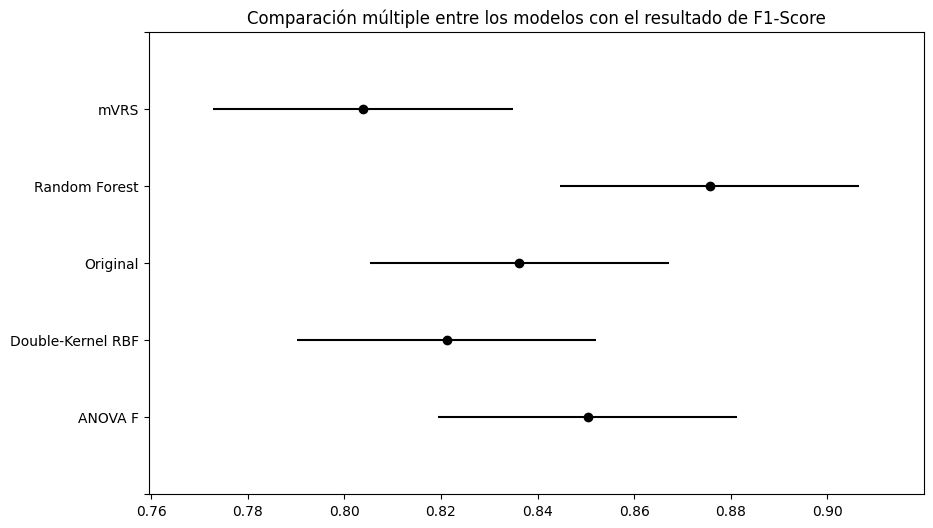

In [ ]:
# ANOVA
f_statistic, p_value = f_oneway(svm_f1_normal,svm_f1_selected,svm_f1_mvrs,svm_f1_rf,svm_f1_rbf)
print(f"Valor F: {f_statistic:.3f}, p-Value: {p_value:.3e}")

# Tukey
modelos = [svm_f1_normal,svm_f1_selected,svm_f1_mvrs,svm_f1_rf,svm_f1_rbf]

# A list of labels is created to identify each dataset.
labels = ['Original'] * len(svm_f1_normal) + ['ANOVA F'] * len(svm_f1_selected) + ['mVRS'] * len(svm_f1_mvrs) + ['Random Forest'] * len(svm_f1_rf) + ['Double-Kernel RBF'] * len(svm_f1_rbf)

# Convert to array
datos = np.concatenate(modelos)

# Test of Tukey
tukey = pairwise_tukeyhsd(datos, labels)
p_values = tukey.pvalues

# p-Values results
print("P-valores:")
print(p_values)
print(tukey.summary())
tukey.plot_simultaneous()
plt.title('Comparación múltiple entre los modelos con el resultado de F1-Score')
plt.show()

#Machine Learning - Different model families for the Dataset with RandomForest Feature Selection

In [ ]:
# Training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_rf, y, test_size=0.2, random_state=42)

# Metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# ML models
models = [
    KNeighborsClassifier(),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    SVC(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    BaggingClassifier()
]

# Hyperparameter ranges for optimisation
param_grid = {
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'p': [1, 2],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'GaussianProcessClassifier': {
        'max_iter_predict': [50, 100, 200],
        'n_restarts_optimizer': [0, 1, 2],
        'warm_start': [True, False]
    },
    'DecisionTreeClassifier': {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'MLPClassifier': {
        'hidden_layer_sizes': [(50, 50), (100, 50, 100)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive'],
        'max_iter': [100, 200, 300]
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'algorithm': ['SAMME', 'SAMME.R']
    },
    'GaussianNB': {},
    'SVC': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4],
        'coef0': [0.0, 1.0, 2.0]
    },
    'GradientBoostingClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'max_iter': [50, 100, 200]
    },
    'BaggingClassifier': {
        'n_estimators': [10, 20, 30],
        'max_samples': [0.5, 0.7, 1.0],
        'max_features': [0.5, 0.7, 1.0],
        'bootstrap_features': [True, False]
    }
}

# GridSearch Exhaustive
for model in models:
    model_name = model.__class__.__name__
    print(f"\nOptimizando hiperparámetros para el modelo {model_name}")
    grid_search = GridSearchCV(model, param_grid=param_grid[model_name], scoring=scoring, refit='f1', cv=5)
    grid_search.fit(X_train, y_train)

    # Best hyperparameters
    print(f"Mejores hiperparámetros para {model_name}:")
    print(grid_search.best_params_)

    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"\nMétricas de evaluación en el conjunto de prueba para {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")


(779, 300)

Iteración 1:
Evaluando modelo: Nearest Neighbors
Evaluando modelo: Gaussian Process
Evaluando modelo: Decision Tree
Evaluando modelo: Random Forest
Evaluando modelo: Neural Net
Evaluando modelo: AdaBoost
Evaluando modelo: Naive Bayes
Evaluando modelo: SVM
Evaluando modelo: Gradient Boosting
Evaluando modelo: Logistic Regression
Evaluando modelo: Bagging

Iteración 2:
Evaluando modelo: Nearest Neighbors
Evaluando modelo: Gaussian Process
Evaluando modelo: Decision Tree
Evaluando modelo: Random Forest
Evaluando modelo: Neural Net
Evaluando modelo: AdaBoost
Evaluando modelo: Naive Bayes
Evaluando modelo: SVM
Evaluando modelo: Gradient Boosting
Evaluando modelo: Logistic Regression
Evaluando modelo: Bagging

Iteración 3:
Evaluando modelo: Nearest Neighbors
Evaluando modelo: Gaussian Process
Evaluando modelo: Decision Tree
Evaluando modelo: Random Forest
Evaluando modelo: Neural Net
Evaluando modelo: AdaBoost
Evaluando modelo: Naive Bayes
Evaluando modelo: SVM
Evaluando modelo: 

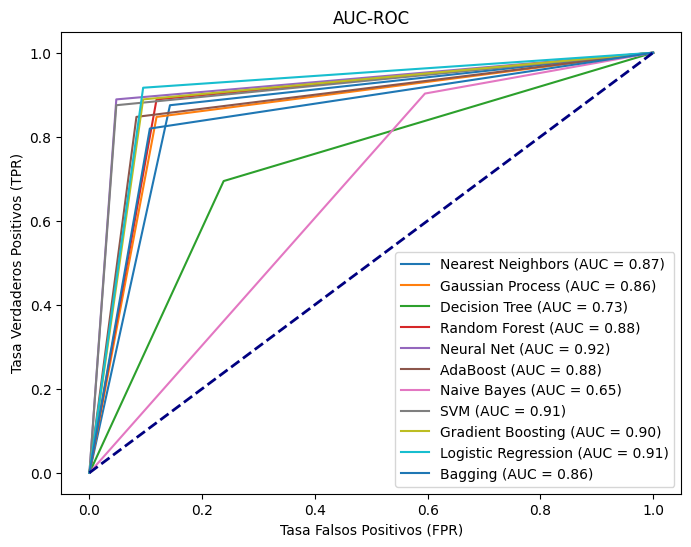

In [ ]:
print(X_rf.shape)
# A dataframe called X_rf is created.
X_rf['True_Labels'] = y

# List of model names
model_names = ["Nearest Neighbors", "Gaussian Process", "Decision Tree", "Random Forest",
               "Neural Net", "AdaBoost", "Naive Bayes", "SVM", "Gradient Boosting", "Logistic Regression", "Bagging"]

models = [
    KNeighborsClassifier(n_neighbors=5, p=1),
    GaussianProcessClassifier(max_iter_predict=50, warm_start=True),
    DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features='log2', min_samples_leaf=4,
                           min_samples_split=5, splitter='random'),
    RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200),
    MLPClassifier(learning_rate='adaptive', max_iter=1000),
    AdaBoostClassifier(n_estimators=200),
    GaussianNB(),
    SVC(C=1, degree=3, gamma='auto'),#, probability=True),
    GradientBoostingClassifier(learning_rate=0.2, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=200),
    LogisticRegression(C=0.1, max_iter=100, penalty='l2'),
    BaggingClassifier(bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20)
]

# Storing results
train_results_list = []
test_results_list = []


for i in range(15):
    print(f"\nIteración {i + 1}:")

    # 80% train 20% test
    X_train, X_test, y_train, y_test = train_test_split(X_rf.drop('True_Labels', axis=1), X_rf['True_Labels'],
                                                        test_size=0.20)

    # Iterating on models
    for model, model_name in zip(models, model_names):
        print(f"Evaluando modelo: {model_name}")
        model.fit(X_train, y_train)
        predictions_train = model.predict(X_train)

        # Calculation of metrics for evaluation in the training package
        train_results = {
            'iteration': i + 1,
            'model': model_name,
            'accuracy_train': accuracy_score(y_train, predictions_train),
            'f1_score_train': f1_score(y_train, predictions_train),
            'precision_train': precision_score(y_train, predictions_train),
            'recall_train': recall_score(y_train, predictions_train),
            'kappa_train': cohen_kappa_score(y_train, predictions_train),
            'roc_train': roc_auc_score(y_train, predictions_train)
        }

        # Calculation of predictions in the test set
        predictions_test = model.predict(X_test)

        # Calculation of metrics for evaluation in the test set
        test_results = {
            'iteration': i + 1,
            'model': model_name,
            'accuracy_test': accuracy_score(y_test, predictions_test),
            'f1_score_test': f1_score(y_test, predictions_test),
            'precision_test': precision_score(y_test, predictions_test),
            'recall_test': recall_score(y_test, predictions_test),
            'kappa_test': cohen_kappa_score(y_test, predictions_test),
            'roc_test': roc_auc_score(y_test, predictions_test)
        }

        # Storing results
        train_results_list.append(train_results)
        test_results_list.append(test_results)

# Create dataframes to visualise the results
eval_df_train = pd.DataFrame(train_results_list)
eval_df_test = pd.DataFrame(test_results_list)

# The results of all iterations are displayed to check for errors.
print("\nResultados en el conjunto de entrenamiento:")
print(eval_df_train)

print("\nResultados en el conjunto de prueba:")
print(eval_df_test)

# Area under the ROC curve for all models

plt.figure(figsize=(8, 6))

for model, model_name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_preds)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa Falsos Positivos (FPR)')
plt.ylabel('Tasa Verdaderos Positivos (TPR)')
plt.title('AUC-ROC')
plt.legend(loc='lower right')
plt.show()



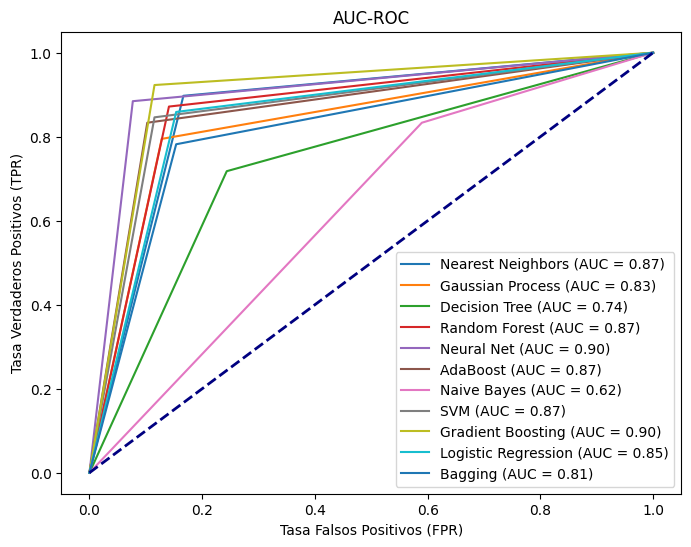

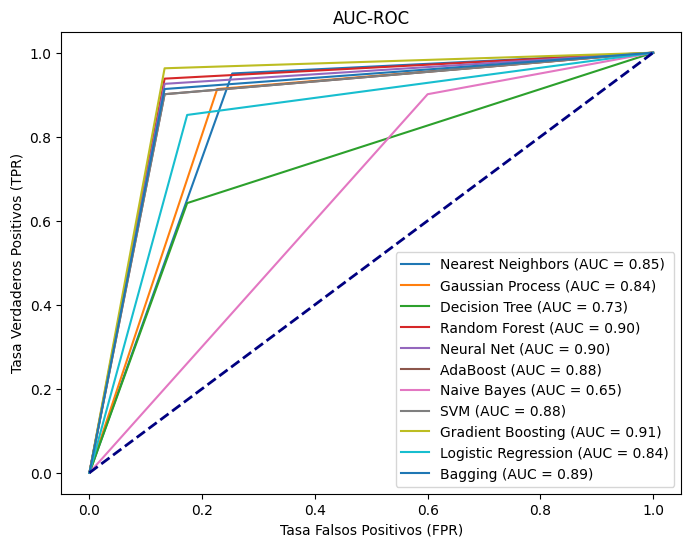

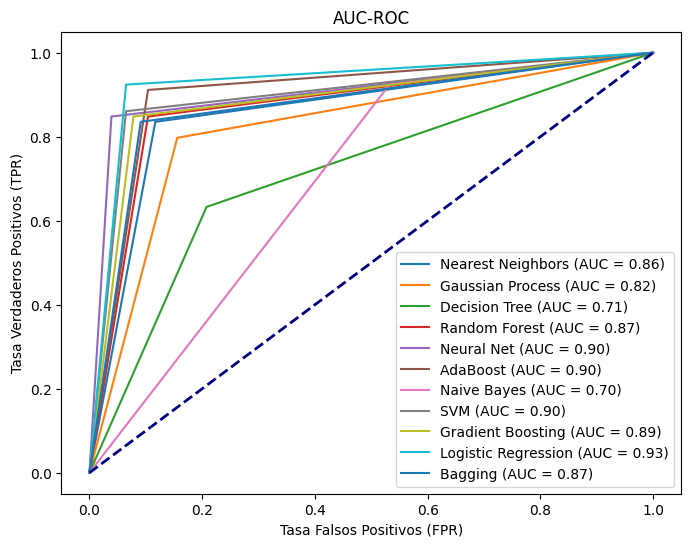

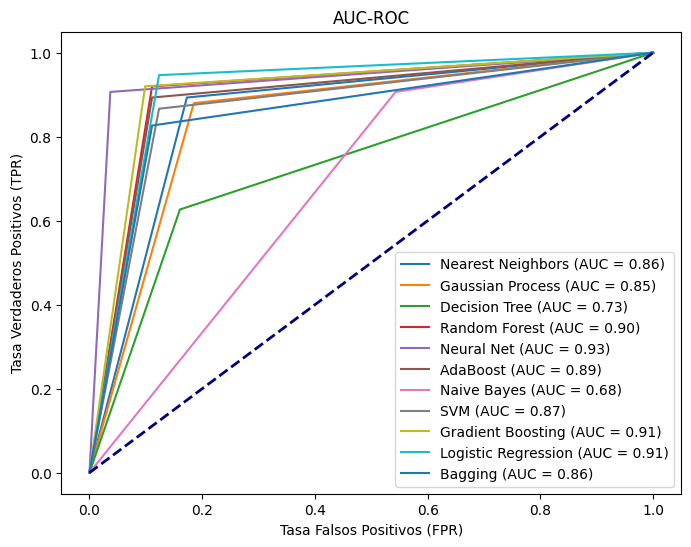

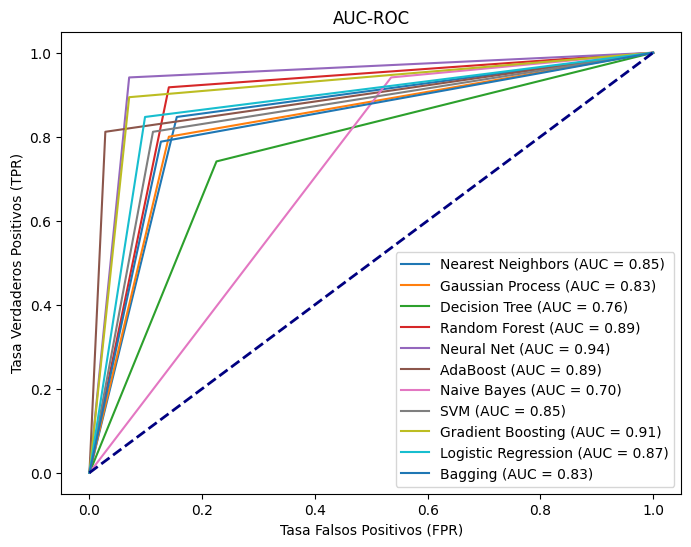

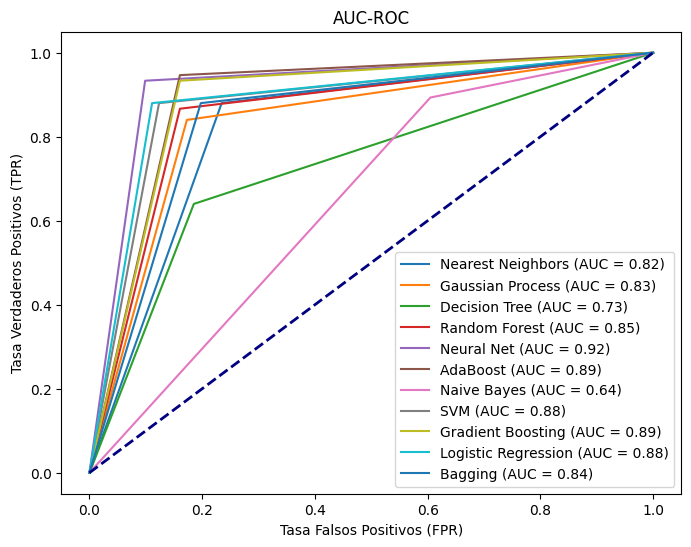

In [ ]:
for i in range(6):
  X_train, X_test, y_train, y_test = train_test_split(X_rf.drop('True_Labels', axis=1), X_rf['True_Labels'],
                                                        test_size=0.20)

  plt.figure(figsize=(8, 6))

  for model, model_name in zip(models, model_names):
      model.fit(X_train, y_train)
      y_preds = model.predict(X_test)
      fpr, tpr, thresholds = roc_curve(y_test, y_preds)
      roc_auc = auc(fpr, tpr)
      plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('Tasa Falsos Positivos (FPR)')
  plt.ylabel('Tasa Verdaderos Positivos (TPR)')
  plt.title('AUC-ROC')
  plt.legend(loc='lower right')
  plt.show()





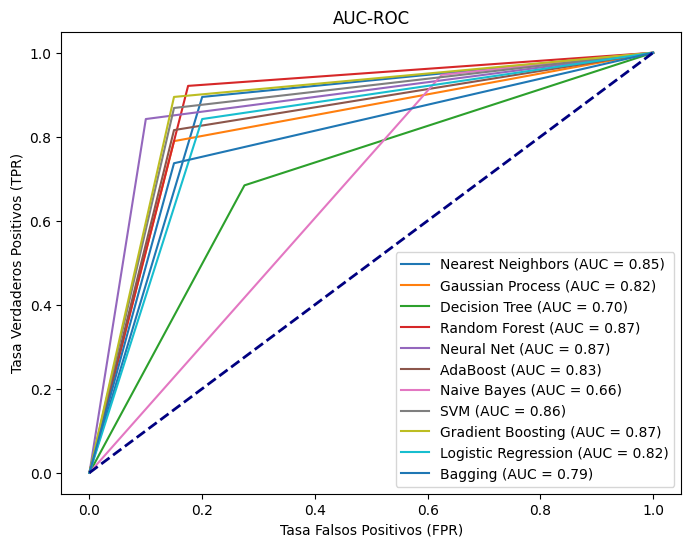

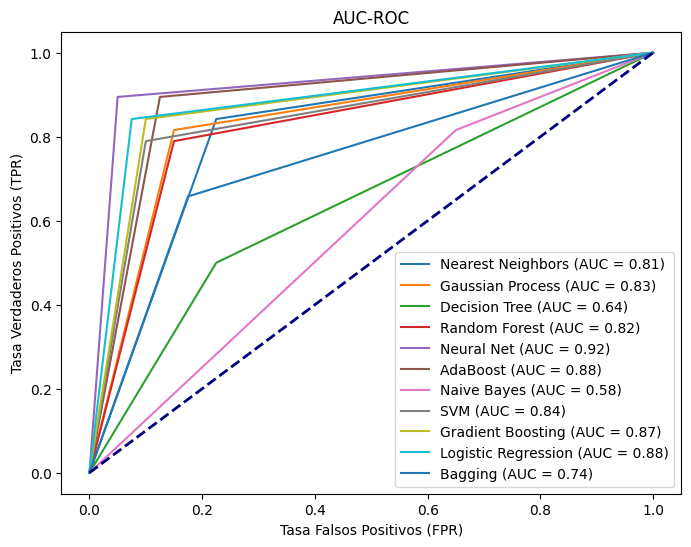

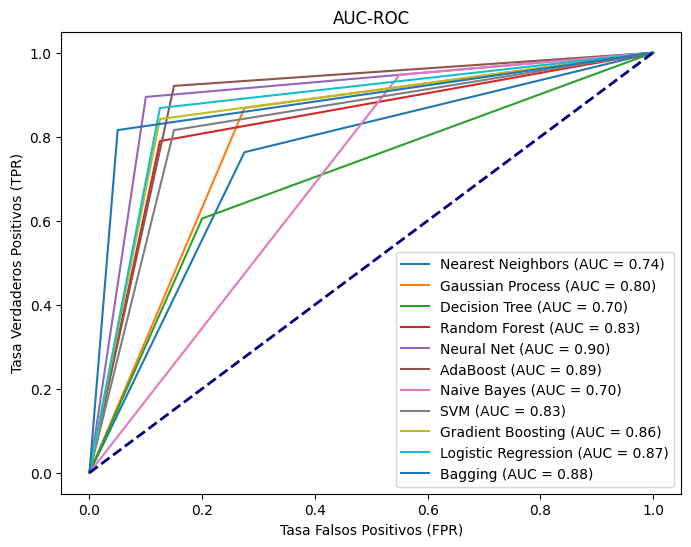

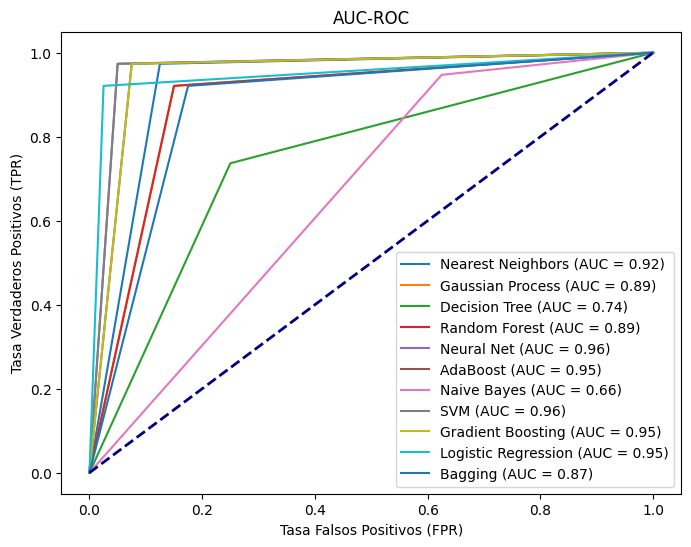

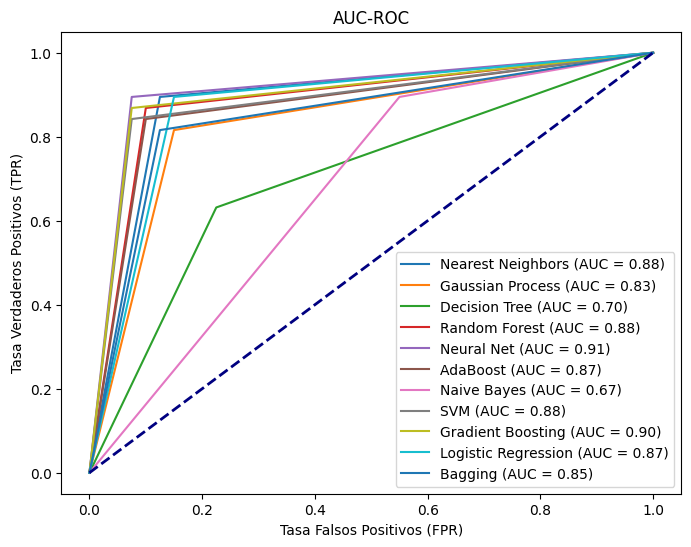

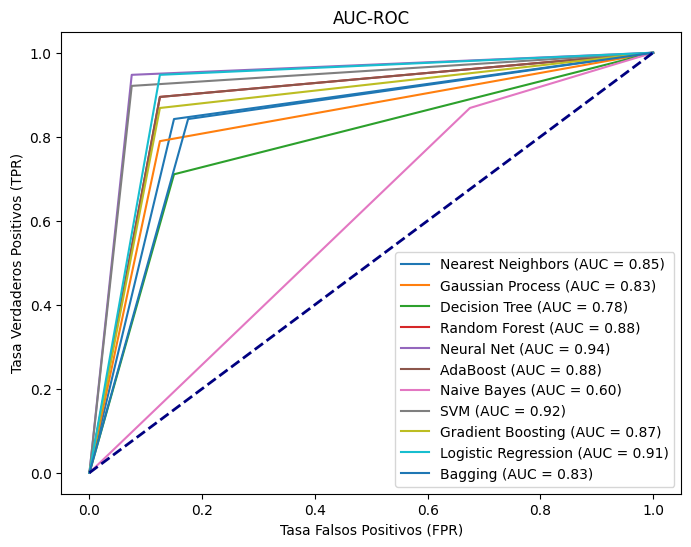

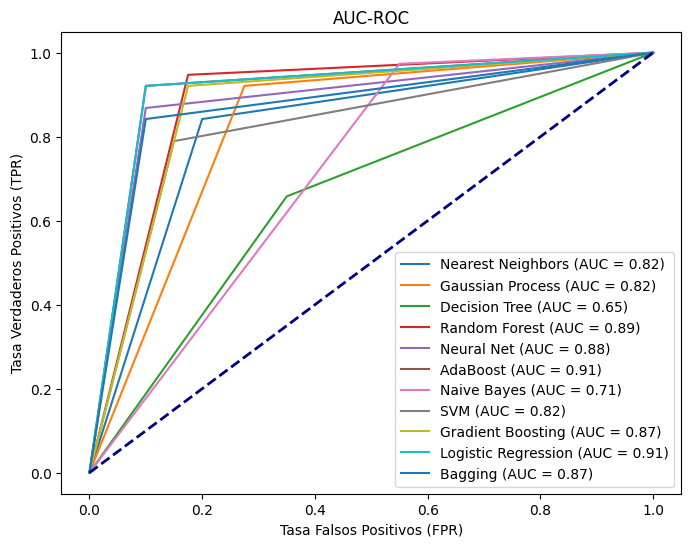

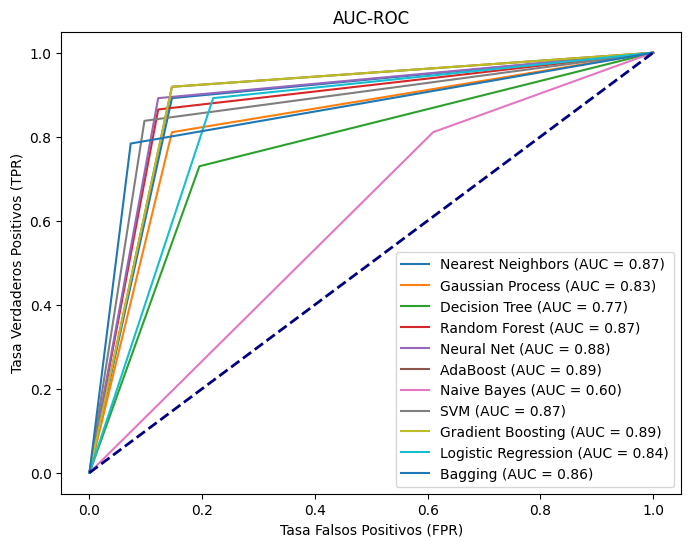

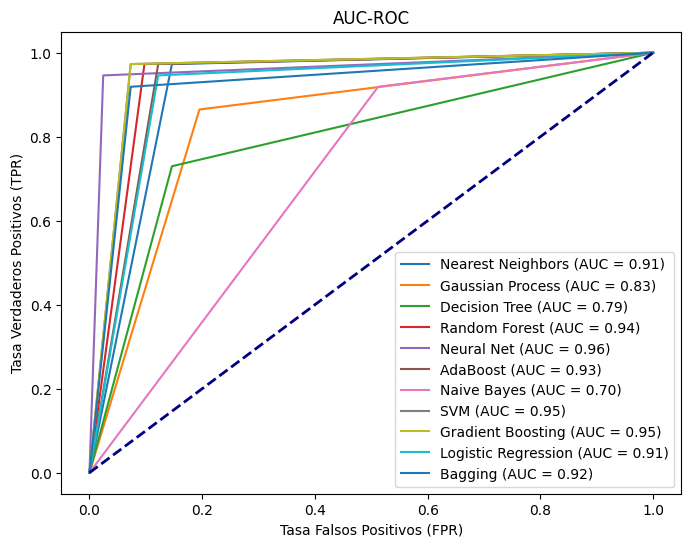

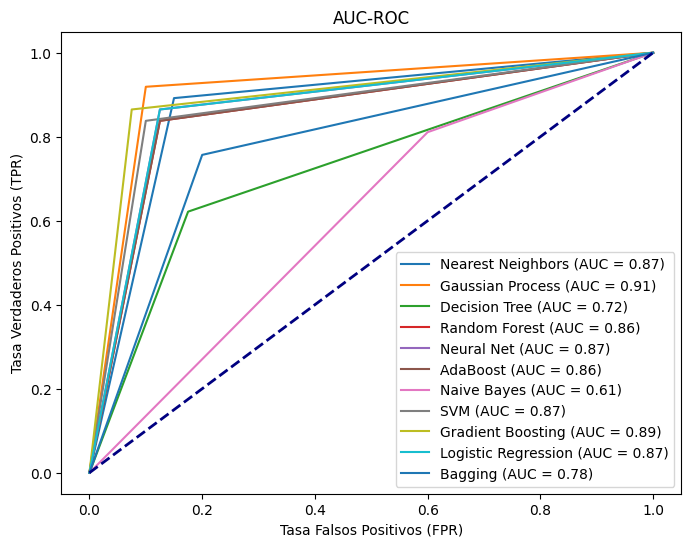

In [ ]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split


for train_index, test_index in kfold.split(X_rf,y):
    X_train, X_test = X_rf.drop('True_Labels', axis=1).iloc[train_index], X_rf.drop('True_Labels', axis=1).iloc[test_index]
    y_train, y_test = X_rf['True_Labels'].iloc[train_index], X_rf['True_Labels'].iloc[test_index]

    plt.figure(figsize=(8, 6))

    for model, model_name in zip(models, model_names):
        model.fit(X_train, y_train)
        y_preds = model.predict(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_preds)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('Tasa Falsos Positivos (FPR)')
    plt.ylabel('Tasa Verdaderos Positivos (TPR)')
    plt.title('AUC-ROC')
    plt.legend(loc='lower right')
    plt.show()


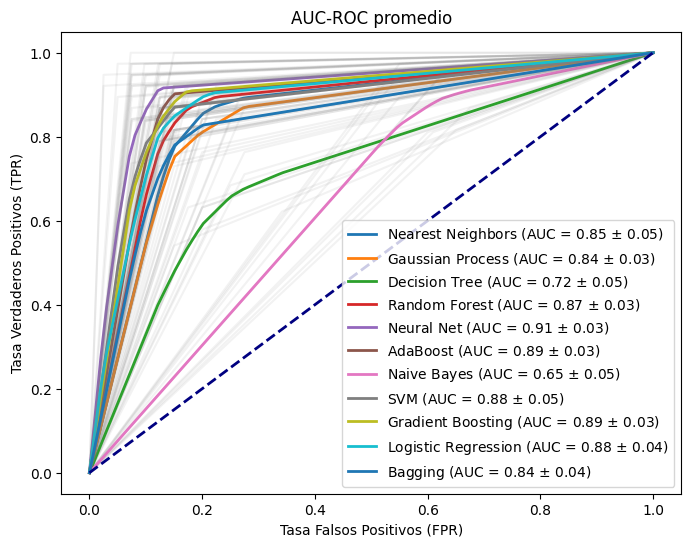

In [ ]:
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(8, 6))

for model, model_name in zip(models, model_names):
    tprs = []
    aucs = []
    for train_index, test_index in kfold.split(X_rf,y):
        X_train, X_test = X_rf.drop('True_Labels', axis=1).iloc[train_index], X_rf.drop('True_Labels', axis=1).iloc[test_index]
        y_train, y_test = X_rf['True_Labels'].iloc[train_index], X_rf['True_Labels'].iloc[test_index]

        model.fit(X_train, y_train)
        y_preds = model.predict(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_preds)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, alpha=0.1, color='gray')  # Líneas suavizadas de k-fold
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(roc_auc)

    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, label=f'{model_name} (AUC = {mean_auc:.2f} $\pm$ {std_auc:.2f})', lw=2)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa Falsos Positivos (FPR)')
plt.ylabel('Tasa Verdaderos Positivos (TPR)')
plt.title('AUC-ROC promedio')
plt.legend(loc='lower right')
plt.show()

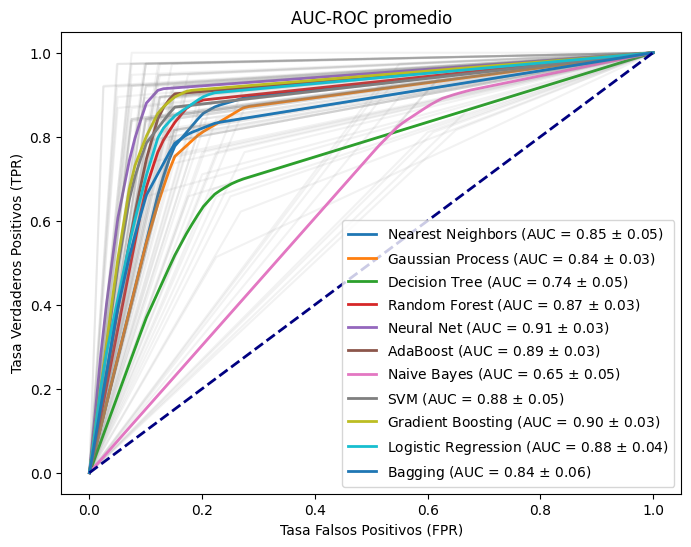

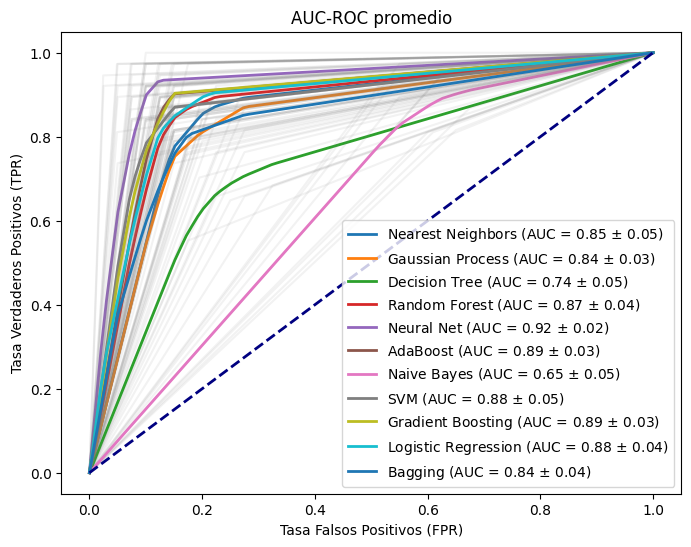

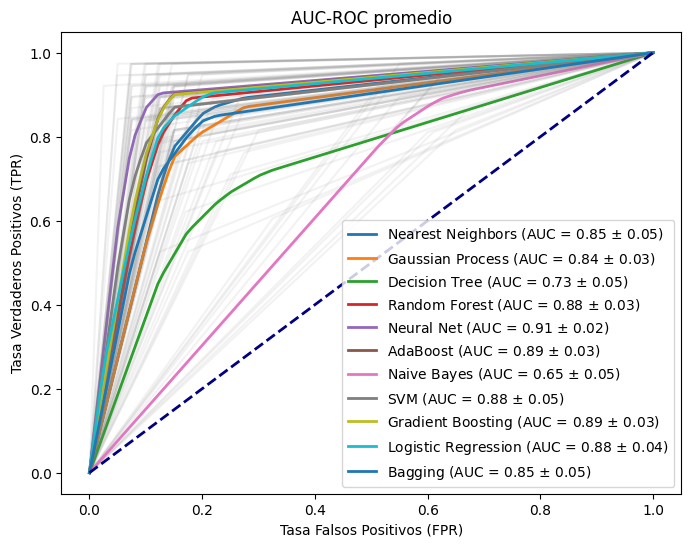

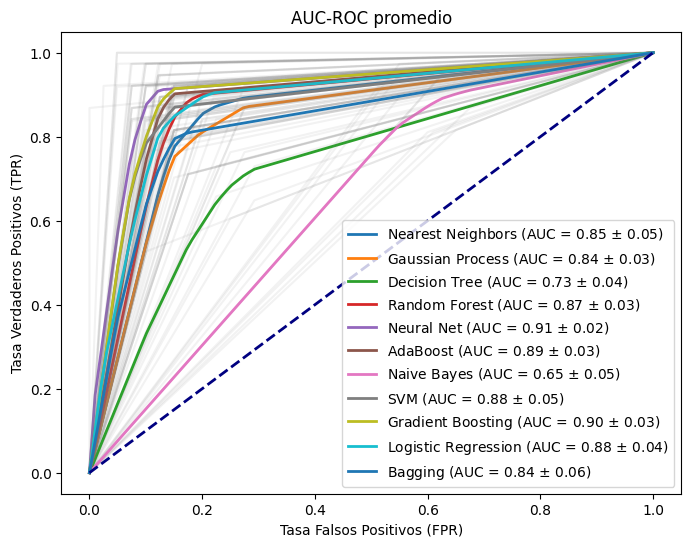

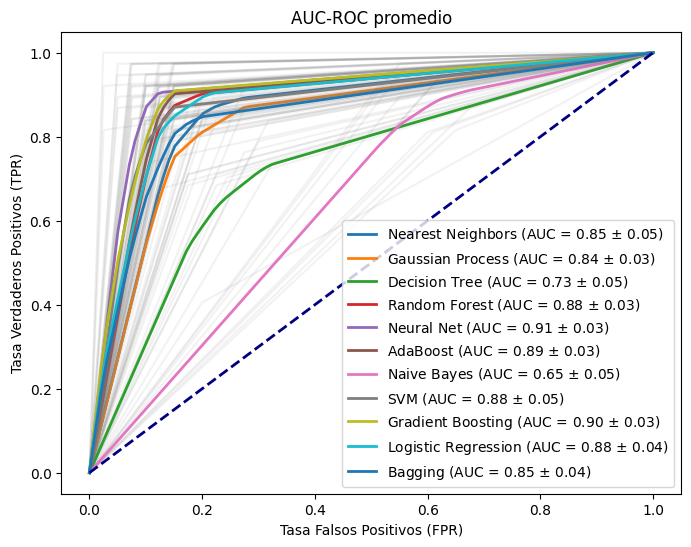

In [ ]:
for k in range(5):
	plt.figure(figsize=(8, 6))
	for model, model_name in zip(models, model_names):
		tprs = []
		aucs = []
		for train_index, test_index in kfold.split(X_rf,y):
			X_train, X_test = X_rf.drop('True_Labels', axis=1).iloc[train_index], X_rf.drop('True_Labels', axis=1).iloc[test_index]
			y_train, y_test = X_rf['True_Labels'].iloc[train_index], X_rf['True_Labels'].iloc[test_index]

			model.fit(X_train, y_train)
			y_preds = model.predict(X_test)
			fpr, tpr, _ = roc_curve(y_test, y_preds)
			roc_auc = auc(fpr, tpr)
			plt.plot(fpr, tpr, alpha=0.1, color='gray')  # Líneas suavizadas de k-fold
			interp_tpr = np.interp(mean_fpr, fpr, tpr)
			interp_tpr[0] = 0.0
			tprs.append(interp_tpr)
			aucs.append(roc_auc)

		mean_tpr = np.mean(tprs, axis=0)
		mean_auc = auc(mean_fpr, mean_tpr)
		std_auc = np.std(aucs)
		plt.plot(mean_fpr, mean_tpr, label=f'{model_name} (AUC = {mean_auc:.2f} $\pm$ {std_auc:.2f})', lw=2)

	plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
	plt.xlabel('Tasa Falsos Positivos (FPR)')
	plt.ylabel('Tasa Verdaderos Positivos (TPR)')
	plt.title('AUC-ROC promedio')
	plt.legend(loc='lower right')
	plt.show()

In [ ]:
# Grouping of results
# Mean
grouped_train_results = eval_df_train.groupby('model').mean().reset_index()
grouped_test_results = eval_df_test.groupby('model').mean().reset_index()

# STD
grouped_train_std = eval_df_train.groupby('model').std().reset_index()
grouped_test_std = eval_df_test.groupby('model').std().reset_index()

# Show grouped results
print("\nResultados agrupados en el conjunto de entrenamiento:")
print(grouped_train_results)
print("\nDesviación agrupados en el conjunto de entrenamiento:")
print(grouped_train_std)
print("\nResultados agrupados en el conjunto de prueba:")
print(grouped_test_results)
print("\Desviación agrupados en el conjunto de prueba:")
print(grouped_test_std)


Resultados agrupados en el conjunto de entrenamiento:
                  model  iteration  accuracy_train  f1_score_train  \
0              AdaBoost        8.0        1.000000        1.000000   
1               Bagging        8.0        0.988657        0.988190   
2         Decision Tree        8.0        0.846549        0.834963   
3      Gaussian Process        8.0        0.996790        0.996669   
4     Gradient Boosting        8.0        1.000000        1.000000   
5   Logistic Regression        8.0        0.945960        0.944721   
6           Naive Bayes        8.0        0.654575        0.717042   
7     Nearest Neighbors        8.0        0.891065        0.889622   
8            Neural Net        8.0        0.990797        0.990456   
9         Random Forest        8.0        1.000000        1.000000   
10                  SVM        8.0        0.929588        0.927170   

    precision_train  recall_train  kappa_train  roc_train  
0          1.000000      1.000000     1.0000

#COMPARISON OF THE DIFFERENT MODELS

In [ ]:
# SHAPIRO, LEVENE, ANOVA and TUKEY tests are performed based on the F1-SCORE of the models.

SVM = eval_df_test['f1_score_test'][eval_df_test['model'] == 'SVM'].reset_index(drop=True)
SVM = SVM.tolist()

Nearest_Neighbors = eval_df_test['f1_score_test'][eval_df_test['model'] == 'Nearest Neighbors'].reset_index(drop=True)
Nearest_Neighbors = Nearest_Neighbors.tolist()

Gaussian_Process = eval_df_test['f1_score_test'][eval_df_test['model'] == 'Gaussian Process'].reset_index(drop=True)
Gaussian_Process = Gaussian_Process.tolist()

Decision_Tree = eval_df_test['f1_score_test'][eval_df_test['model'] == 'Decision Tree'].reset_index(drop=True)
Decision_Tree = Decision_Tree.tolist()

Random_Forest = eval_df_test['f1_score_test'][eval_df_test['model'] == 'Random Forest'].reset_index(drop=True)
Random_Forest = Random_Forest.tolist()

Neural_Net = eval_df_test['f1_score_test'][eval_df_test['model'] == 'Neural Net'].reset_index(drop=True)
Neural_Net = Neural_Net.tolist()

AdaBoost = eval_df_test['f1_score_test'][eval_df_test['model'] == 'AdaBoost'].reset_index(drop=True)
AdaBoost = AdaBoost.tolist()

Naive_Bayes = eval_df_test['f1_score_test'][eval_df_test['model'] == 'Naive Bayes'].reset_index(drop=True)
Naive_Bayes = Naive_Bayes.tolist()

Gradient_Boosting = eval_df_test['f1_score_test'][eval_df_test['model'] == 'Gradient Boosting'].reset_index(drop=True)
Gradient_Boosting = Gradient_Boosting.tolist()

Logistic_Regression = eval_df_test['f1_score_test'][eval_df_test['model'] == 'Logistic Regression'].reset_index(drop=True)
Logistic_Regression = Logistic_Regression.tolist()

Bagging = eval_df_test['f1_score_test'][eval_df_test['model'] == 'Bagging'].reset_index(drop=True)
Bagging = Bagging.tolist()




In [ ]:
model_names = ["Nearest Neighbors", "Gaussian Process", "Arbol de decision", "Random Forest",
               "Neural Net", "AdaBoost", "Naive Bayes", "SVM", "Gradient Boosting", "Regresión Logistica", "Bagging"]

# Test of Shapiro-Wilk
shapiro_stat_knn, shapiro_p_knn = shapiro(Nearest_Neighbors)
shapiro_stat_gauss, shapiro_p_gauss = shapiro(Gaussian_Process)
shapiro_stat_tree, shapiro_p_tree = shapiro(Decision_Tree)
shapiro_stat_Random_Forest, shapiro_p_Random_Forest = shapiro(Random_Forest)
shapiro_stat_net, shapiro_p_net = shapiro(Neural_Net)
shapiro_stat_ada, shapiro_p_ada = shapiro(AdaBoost)
shapiro_stat_bayes, shapiro_p_bayes = shapiro(Naive_Bayes)
shapiro_stat_svm, shapiro_p_svm = shapiro(SVM)
shapiro_stat_grad, shapiro_p_grad = shapiro(Gradient_Boosting)
shapiro_stat_log, shapiro_p_log = shapiro(Logistic_Regression)
shapiro_stat_bagging, shapiro_p_bagging = shapiro(Bagging)



# Results
print(f"Shapiro-Wilk para F1 en el modelo kNN: Estadístico={shapiro_stat_knn:.3f}, p-valor={shapiro_p_knn:.3f}")
print(f"Shapiro-Wilk para F1 en el modelo Gaussian Process: Estadístico={shapiro_stat_gauss:.3f}, p-valor={shapiro_p_gauss:.3f}")
print(f"Shapiro-Wilk para F1 en el modelo Decision Tree: Estadístico={shapiro_stat_tree:.3f}, p-valor={shapiro_p_tree:.3f}")
print(f"Shapiro-Wilk para F1 en el modelo Random Forest: Estadístico={shapiro_stat_Random_Forest:.3f}, p-valor={shapiro_p_Random_Forest:.3f}")
print(f"Shapiro-Wilk para F1 en el modelo Neural Net: Estadístico={shapiro_stat_net:.3f}, p-valor={shapiro_p_net:.3f}")
print(f"Shapiro-Wilk para F1 en el modelo AdaBoost: Estadístico={shapiro_stat_ada:.3f}, p-valor={shapiro_p_ada:.3f}")
print(f"Shapiro-Wilk para F1 en el modelo Naive Bayes: Estadístico={shapiro_stat_bayes:.3f}, p-valor={shapiro_p_bayes:.3f}")
print(f"Shapiro-Wilk para F1 en el modelo SVM: Estadístico={shapiro_stat_svm:.3f}, p-valor={shapiro_p_svm:.3f}")
print(f"Shapiro-Wilk para F1 en el modelo Gradient Boosting: Estadístico={shapiro_stat_grad:.3f}, p-valor={shapiro_p_grad:.3f}")
print(f"Shapiro-Wilk para F1 en el modelo Logistic Regression: Estadístico={shapiro_stat_log:.3f}, p-valor={shapiro_p_log:.3f}")
print(f"Shapiro-Wilk para F1 en el modelo Bagging: Estadístico={shapiro_stat_bagging:.3f}, p-valor={shapiro_p_bagging:.3f}")



#LEVENE
levene_stat, levene_p = levene(Nearest_Neighbors, Gaussian_Process, Decision_Tree, Random_Forest, Neural_Net, AdaBoost, Naive_Bayes, SVM,
                               Gradient_Boosting, Logistic_Regression, Bagging)
print(f"\nPrueba de Levene para F1: Estadístico={levene_stat:.3f}, p-valor={levene_p:.3f}")

Shapiro-Wilk para F1 en el modelo kNN: Estadístico=0.970, p-valor=0.852
Shapiro-Wilk para F1 en el modelo Gaussian Process: Estadístico=0.963, p-valor=0.749
Shapiro-Wilk para F1 en el modelo Decision Tree: Estadístico=0.901, p-valor=0.099
Shapiro-Wilk para F1 en el modelo Random Forest: Estadístico=0.955, p-valor=0.608
Shapiro-Wilk para F1 en el modelo Neural Net: Estadístico=0.902, p-valor=0.103
Shapiro-Wilk para F1 en el modelo AdaBoost: Estadístico=0.923, p-valor=0.213
Shapiro-Wilk para F1 en el modelo Naive Bayes: Estadístico=0.909, p-valor=0.129
Shapiro-Wilk para F1 en el modelo SVM: Estadístico=0.965, p-valor=0.776
Shapiro-Wilk para F1 en el modelo Gradient Boosting: Estadístico=0.908, p-valor=0.127
Shapiro-Wilk para F1 en el modelo Logistic Regression: Estadístico=0.890, p-valor=0.067
Shapiro-Wilk para F1 en el modelo Bagging: Estadístico=0.925, p-valor=0.230

Prueba de Levene para F1: Estadístico=0.699, p-valor=0.725


Valor F: 82.929, p-Value: 8.552e-57
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
           AdaBoost   Arbol de decisión  -0.1759    0.0 -0.2114 -0.1404   True
           AdaBoost             Bagging  -0.0565    0.0 -0.0919  -0.021   True
           AdaBoost   Gradient Boosting   0.0098  0.998 -0.0256  0.0453  False
           AdaBoost         Naive Bayes  -0.1753    0.0 -0.2108 -0.1399   True
           AdaBoost   Nearest Neighbors  -0.0249 0.4431 -0.0604  0.0106  False
           AdaBoost          Neural Net   0.0229 0.5725 -0.0126  0.0584  False
           AdaBoost   Proceso Gaussiano  -0.0407 0.0109 -0.0762 -0.0053   True
           AdaBoost       Random Forest  -0.0102 0.9973 -0.0457  0.0252  False
           AdaBoost Regresion logística  -0.0012    1.0 -0.0366  0.0343  False
           AdaBo

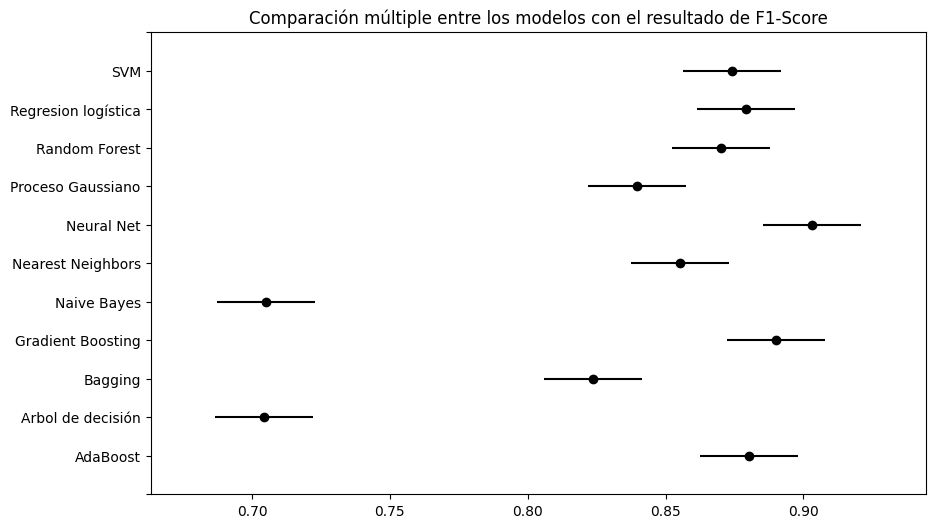

In [ ]:
# ANOVA
f_statistic, p_value = f_oneway(Nearest_Neighbors, Gaussian_Process, Decision_Tree, Random_Forest, Neural_Net, AdaBoost, Naive_Bayes, SVM,
                               Gradient_Boosting, Logistic_Regression, Bagging)
print(f"Valor F: {f_statistic:.3f}, p-Value: {p_value:.3e}")

# F1 Scores
modelos = [Nearest_Neighbors, Gaussian_Process, Decision_Tree, Random_Forest, Neural_Net, AdaBoost, Naive_Bayes, SVM,
                           Gradient_Boosting, Logistic_Regression, Bagging]


# Labels
model_names = ['Nearest Neighbors', 'Gaussian Process', 'Arbol de decision', 'Random Forest', 'Neural Net', 'AdaBoost', 'Naive Bayes', 'SVM',
               'Gradient Boosting', 'Regresion logística', 'Bagging']


# Tukey's test
tukey = pairwise_tukeyhsd(np.concatenate(modelos), np.repeat(model_names, [len(m) for m in modelos]))

print(tukey.summary())
tukey.plot_simultaneous()
plt.title('Comparación múltiple entre los modelos con el resultado de F1-Score')
plt.show()

#EXTRAS

Porcentaje de Mujeres y Hombres en el DataSet 
Genero
F    52.27
M    47.73
Name: Age, dtype: float64


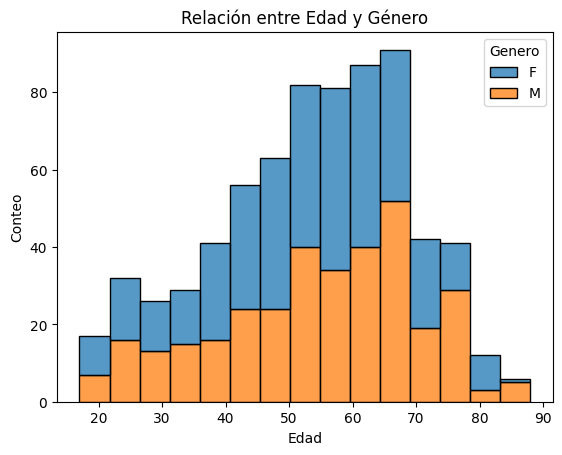

54.23 15.18 55.0


In [ ]:
import seaborn as sns
df = datos_clinicos.copy()
df = pd.DataFrame(df)
df.rename(columns={'Gender': 'Genero'}, inplace=True)
total_por_genero = df.groupby('Genero')['Age'].count()
porcentajes = total_por_genero / total_por_genero.sum() * 100
print(f'Porcentaje de Mujeres y Hombres en el DataSet \n{round(porcentajes,2)}')

sns.histplot(data=df, x='Age', hue='Genero', multiple='stack')
plt.title('Relación entre Edad y Género')
plt.xlabel('Edad')
plt.ylabel('Conteo')
plt.show()
print(round(df['Age'].mean(),2),round(df['Age'].std(),2),df['Age'].median())

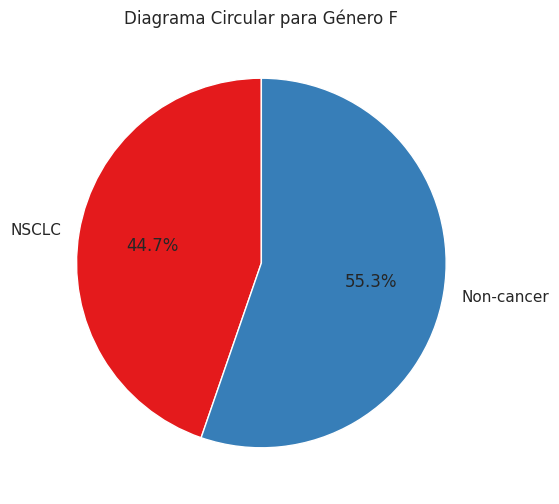

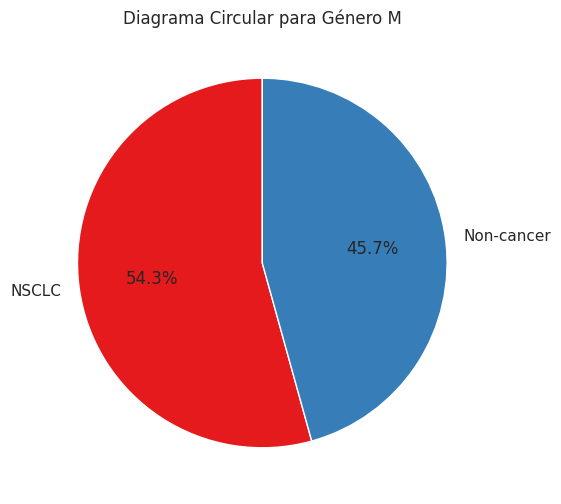

In [ ]:
#Filtrar para conseguir un DataFrame solo con mujeres
df_filtered_f = df[df['Gender'] == 'F']
df_counts_f = df_filtered_f.groupby(['Gender', df_filtered_f['Classification group'].fillna('Desconocido')]).size().unstack()

#Diagrama circular para 'F'
plt.figure(figsize=(6, 6))
data_f = df_counts_f.loc['F']
plt.pie(data_f, labels=data_f.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set1'))
plt.title('Diagrama Circular para Género F')
plt.show()

#Ídem pero con hombres
df_filtered_m = df[df['Gender'] == 'M']
df_counts_m = df_filtered_m.groupby(['Gender', df_filtered_m['Classification group'].fillna('Desconocido')]).size().unstack()

#Diagrama circular para 'M'
plt.figure(figsize=(6, 6))
data_m = df_counts_m.loc['M']
plt.pie(data_m, labels=data_m.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set1'))
plt.title('Diagrama Circular para Género M')
plt.show()



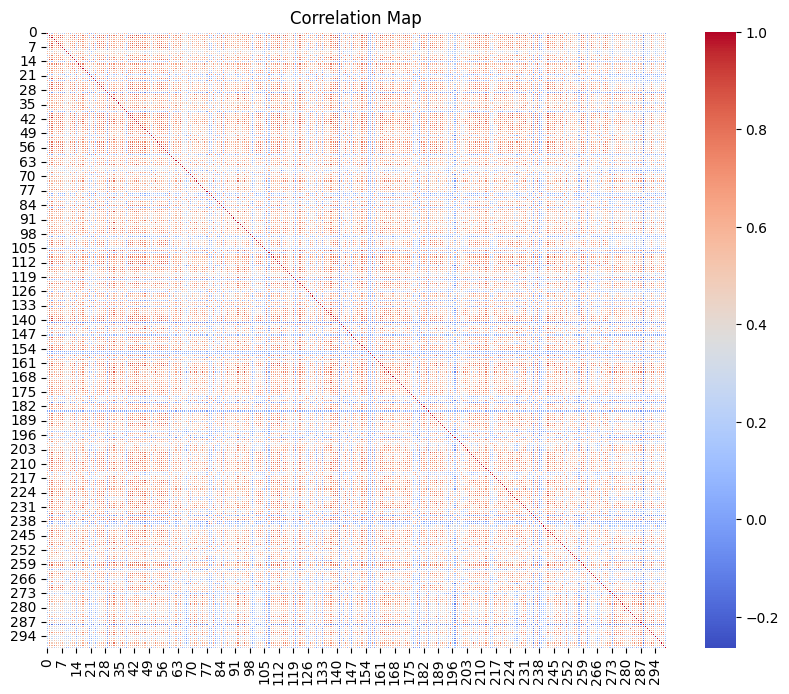

In [ ]:
correlation_matrix = X_rf.corr()

#Máscara para ocultar la mitad superior
#mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.70)#, mask=mask)
plt.title('Correlation Map')
plt.show()